In [1]:
import time
start0 = time.time()


# Workflow



# Music Genre Classification - Supervised Learning

**Author:** Johanna Tulisalmi-Eskola year 2021  
**Context:** This notebook is part of my thesis related to automatic music genre classification using supervised methods.  
**Content:** Creating and Comparing Music Genre Classification Models.  
**Performance Measure:** Classification Accuracy  
**Data:** GTZAN audio dataset  
**Features:** Several audio features extracted from GTZAN dataset  
**Methods:** Random Forest, KNN, Logistic Regression, and SVM  
**References:** Listed in the end of notebook  
***

### Introduction

This notebook experiments on music genre classifier model creation using machine learning. Music genre classifier models can be part of music information retrieval system. In this project music genre classification accuracy was selected as performance measure. Audio features extracted from GTZAN dataset were utilised for model training.  

Main steps are listed below. Some parts of these were taken manually.  

**1.** <a href = '#1.-Project-Preparations'>**Project Preparations:**</a> Creating project folder structure and initialising git and GitHub connection  
- 1.1 <a href = '#1.1-User-Input-for-Project-and-Experiment'>User Input for Project and Experiment</a>  
- 1.2 <a href = '#1.2-Jupyter-Magic,-Imports,-and-Panda-Settings'>Jupyter Magic, Imports, and Panda Settings</a>  
- 1.3 <a href = '#1.3-Creating-Project-Folders'>Creating Project Folders</a>  
- 1.4 <a href = '#1.4-Preparing-Manual-Tasks'>Preparing Manual Tasks</a>  
- 1.5 <a href = '#1.5-Outcome'>Outcome</a>    

**2.** <a href = '#2.-Data'>**Data:**</a> Getting data 
- 2.1 <a href = '#2.1-Downloading-Audio-Data'>Downloading Audio Data</a>   
- 2.2 <a href = '#Outcome'>Outcome</a>    

**3.** <a href = '#3.-Features'>**Features:**</a> Discovering and visualizing data to gain insights 
- 3.1 <a href = '#3.1-Calculating-or-Fetching-Feature-Sets'>Calculating or Fetching Feature Sets</a>  
- 3.2 <a href = '#3.2-First-Look-at-Feature-Data-Structure'>First Look at Feature Data Structure</a>    
- 3.3 <a href = '#3.3-Creating-Train-,-Validation-,-and-Test-Sets'>Creating Train-, Validation-, and Test Sets</a>    
- 3.4 <a href = '#3.4-Discovering-Feature-Data'>Discovering Feature Data</a>  
- 3.5 <a href = '#3.5-Outcome'>Outcome</a>  

**4.** <a href = '#4.-Preparing-Data-for-Machine-Learning-Algorithms'>**Data Preparation:**</a> Preparing data for machine learning algorithms  
- 4.1 <a href = '#4.1-Transforming-Right-Skewed-Variables-with-ln(x)'>Transforming Right Skewed Variables with ln(x)</a>  
- 4.2 <a href = '#4.2-Scaling'>Scaling</a>  
- 4.3 <a href = '#4.3-Save-Prepared-Training,-Validation-and-Test-Sets-to-Folder-for-Processed-Data'>Save Prepared Training, Validation and Test Sets to Folder for Processed Data</a>
- 4.4 <a href = '#4.4-Quick-Check-on-Random-Forest-Model-Feature-Importances'>Quick Check on Random Forest Model Feature Importances</a>  
- 4.5 <a href = '#4.5-Outcome'>Outcome</a>  

**5.** <a href = '#5.-Modeling'>**Modeling:**</a> Building selected models, fine-tuning models, saving models  
- 5.1 <a href = '#5.1-Creating-Model-Baseline-Using-Several-Algorithms-with-Default-Hyperparameters'>Creating Model Baseline Using Several Algorithms with Default Hyperparameters</a>    
    - 5.1.2 <a href = '#5.1.2-Random-Forest-Classifier-Performance-and-Error-Checking'>Random Forest Classifier Performance and Error Checking</a>   
- 5.2 <a href = '#5.2-Tuning-and-Testing-Models'>Tuning and Testing Models</a> 
    - 5.2.1 <a href = '#5.2.1-Random-Forest-Model'>Random Forest Model</a>  
    - 5.2.2 <a href = '#5.2.2-K-Nearest-Neighbor-Model'>K Nearest Neighbor Model</a>  
    - 5.2.3 <a href = '#5.2.3-Logistic-Regression-Model'>Logistic Regression Model</a>  
    - 5.2.4 <a href = '#5.2.4-Support-Vector-Machine-Model'>Support Vector Machine Model</a>  
     
**6.** <a href = '#6.-Independencies'>**Independencies**</a>  
**7.** <a href = '#7.-References'>**References**</a>  


## 1. Project Preparations



## 1.1 User Input for Project and Experiment


<div class="alert alert-block alert-info">
    Before continuing, the requred information on project and experiment was filled into the cells below.   
</div>


In [2]:
# FILL IN input required for project setup
user_defined_project_parent_directory = 'C:/Users/jtuli/Documents/04 OPISKELU/YAMK' # BEFORE EXECUTING ADJUST THIS FOR THE PROJECT
user_defined_project_directory_name = 'thesis_ml' # BEFORE EXECUTING ADJUST THIS - set here name for project directory

# CHANGE this to True if you want to create folder structure for project
create_new_project_folders = False

In [3]:
# FILL iN an identifier for the experiment. This id is used in saving objects to file.
experiment_id = 'exp02_'
experiment_description = 'Conventional models using all 3 sec features'

Project needs clear folder structure and basic informative files. Git and GitHub connection needs to be initialised for enabling version control and sharing the files. These actions support model development and experiment  repeatability. Actions are partially done manually and partially by commands in the cells below.

<a href = '#Introduction'>Back to Introduction</a>


## 1.2 Jupyter Magic, Imports, and Panda Settings


#### Jupyter Magics

In [4]:
# Jyputer notebook specific setting for matplotlib handling
%matplotlib inline


#### Importing needed libraries


In [5]:
# All the import clauses used in this notebook are collected here

# system and filehandling
import os
import tarfile
import urllib.request
import pickle

# calculation and data handling
import math
from math import log
# import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# visualising
import seaborn as sns

# data preparation
from sklearn.preprocessing import StandardScaler

# model algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# model selection and evaluation
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# metrics
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#### Some settings for pandas

In [6]:
# some settings for pandas for displaying output
pd.set_option('precision', 4)
pd.set_option('max_columns', 60)
pd.set_option('display.width', None)


#### Reprodusability considered by constant random_state input


In [7]:
# 54 is a 'constant number' passed to all objects requiring an random_state parameter. 54 is just from my imagination.
# This is set to obtain reprodusible results across several code executions.
# Although this has different efects on estimators, splitter functions, and cross-validation.
rng = 54

<a href = '#Introduction'>Back to Introduction</a>


## 1.3 Creating Project Folders



#### Global variables: These Path 'Constants' Below are Used Across the Notebook.


In [8]:
# input needed project directory path settings
# setting the project related paths and other configurations
  
PROJECT_PARENT_DIR = user_defined_project_parent_directory
PROJECT_DIR_NAME = user_defined_project_directory_name

PROJECT_ROOT_DIR = os.path.join(PROJECT_PARENT_DIR, PROJECT_DIR_NAME)
# Where to save models
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, 'models')
PROCESSED_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'data/processed')

In [9]:
# creating project folder structure
if create_new_project_folders:
    
    os.chdir(PROJECT_PARENT_DIR)
    os.mkdir(PROJECT_DIR_NAME)

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','external'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','interim'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','processed'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'data','raw'))

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'models'))

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks','explore'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks','other'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'notebooks','poc'))

    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src','data'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src','features'))
    os.mkdir(os.path.join(PROJECT_ROOT_DIR,'src','model'))
    
    print('Folder structure for project:', PROJECT_DIR_NAME + ' was created under ', PROJECT_PARENT_DIR)
    
else:
    print('Folder creation skipped.')

Folder creation skipped.


<a href = '#Introduction'>Back to Introduction</a>


## 1.4 Preparing Manual Tasks

Informative files (readme.md and requirements.txt) were manually added under the project folder.  
In addition Git and GitHub connections were manually established.


## 1.5 Outcome

If new folders were requested to create abowe, the following folder structure was established:
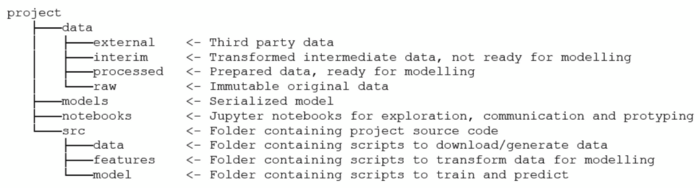
<br>Figure source: https://towardsdatascience.com/structuring-machine-learning-projects-be473775a1b6  
<br>
After malual actions version control using git is initialised and connection to GitHub is working and project files can be shared on GitHub.  

The project preparations are ready and working on data, features, and modelling can start.  

Experiment has got an unique identifier from user. That experiment id is used in naming the objects that are saved to file.

<a href = '#Introduction'>Back to Introduction</a>


## 2. Data


To train models data is needed. For this project GTZAN audio dataset was decided to be used. It is available on internet. Next that dataset needs to be downloaded into the data/raw -folder of this project.
<br><br>
GTZAN was introdused by Tzanetakis in 2001. Information on GTZAN is available on http://martyas.info/downloads/datasets.html (1) GTZAN dataset contains 1000 .wav 30 second long audio files. These audio samples represent ten genres; 100 samples per music genre.

<a href = '#Introduction'>Back to Introduction</a>


## 2.1 Downloading Audio Data



#### Downloading


In [10]:
# Downloading audio data set GTZAN
# GTZAN data set was downloaded from opihi.cs.uvic.ca/sound/genres.tar.gz to local laptop and extracted.
# size of genres.tar.gz file is 1.1 GB 

def fetch_gtzan_dataset(source_url, destination_path):
    """Downloading genres.tar.gz file and extracting it."""
    if not os.path.isdir(destination_path):
        os.makedirs(destination_path)
    tgz_path = os.path.join(destination_path, "genres.tar.gz")
   
    urllib.request.urlretrieve(source_url, tgz_path)
    gtzan_tgz = tarfile.open(tgz_path)
    gtzan_tgz.extractall(path=destination_path)
    gtzan_tgz.close()

source = "http://opihi.cs.uvic.ca/sound/genres.tar.gz"
destination = os.path.join(PROJECT_ROOT_DIR,"data", "raw")

get_data = False # if you want to fetch GTZAN data set from internet then set get_data to True

if get_data:
    fetch_gtzan_dataset(source,destination)
else:
    print('Fetching GTZAN dataset skipped.')    

Fetching GTZAN dataset skipped.



## 2.2 Outcome

GTZAN audio dataset was downloaded from internet into local data/raw -folder and extracted.  

Note: Eventhough in this notebook a ready made feature set is used, these music sample files were required for a related study providing a human baseline for this music genre classifier experiment.

<a href = '#Introduction'>Back to Introduction</a>


## 3. Features


Raw audio samples as such are not suitable as input for machine learning algorithms, thus one needs to extract features from audio samples. After that data is explored and visualized to gain insights. Data set is split into training, validation, and test sets. Finally the feature data is prepared for machine learning algorithms.

- looking at the data structure
- feature distributions, how do those look like?
- are all values included?
- which features matter the most?
- engineering new meaningful and descriptive features? (out of the scope of this notebook and project)

<a href = '#Introduction'>Back to Introduction</a>


## 3.1 Calculating or Fetching Feature Sets

Options considered were:

1. Extracting/calculating features from audio samples using for example the librosa library.
2. Getting ready calculated feature data set from internet.

Since gtzan audio feature data in csv file was readily available at kaggle.com https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification (2), that was desided to be used in this project.  

The feature data was manually downloaded and extracted from download url: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification/download (2). Features include 20 first MFCCs, and many other frequently used audio content features extracted from 30 second audio samples.  

#### Outcome

Feature data sets and spectrogram images stored under project data-folders.

<a href = '#Introduction'>Back to Introduction</a>


## 3.2 First Look at Feature Data Structure


In [11]:
# loading feature csv file into pandas dataframe
csv_source_path = os.path.join(PROJECT_ROOT_DIR,'data/raw/features_3_sec.csv')
gtzan_features_3_sec_df = pd.read_csv(csv_source_path, sep=',')

In [12]:
# listing information on the feature data. This shows what features are included in the data.
gtzan_features_3_sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

<div class="alert alert-block alert-info">
    The output of the above information on the feature data shows all the features have all the values included. (9990 non-null values for all features; good. In addlidion all feature values are numeric, only filename, and target classes i.e. the labels, are text. So far the feature data is in suitable for machine learning.) Filename and length will not be used in model training.
    <br><br>
    The size of feature dataset is 9990 samples.
</div>

In [13]:
# listing five first samples
gtzan_features_3_sec_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.3354,0.0910,0.1304,0.0035,1773.0650,167541.6309,1972.7444,117335.7716,3714.5604,1.0808e+06,0.0819,0.0006,-7.8485e-05,0.0084,-6.8162e-05,0.0055,129.1992,-118.6279,2440.2866,125.0836,260.9569,-23.4437,364.0817,41.3215,181.6949,-5.9761,152.9631,20.1151,75.6523,-16.0454,40.2271,17.8552,84.3203,-14.6334,83.4372,10.2705,97.0013,-9.7083,66.6699,10.1839,45.1036,-4.6816,34.1695,8.4174,48.2694,-7.2335,42.7709,-2.8536,39.6871,-3.2413,36.4882,0.7222,38.0992,-5.0503,33.6181,-0.2430,43.7718,blues
1,blues.00000.1.wav,66149,0.3431,0.0861,0.1127,0.0014,1816.6938,90525.6909,2010.0515,65671.8757,3869.6822,6.7224e+05,0.0872,0.0010,-9.8949e-05,0.0050,-1.0335e-04,0.0049,123.0469,-125.5907,2038.3442,122.4212,216.7742,-20.7180,231.9798,50.1284,142.7004,-11.3333,139.2431,21.3854,77.8179,-15.9608,97.3640,19.4541,57.9481,-12.4659,68.2715,17.8982,56.2222,-11.7326,54.3739,8.1450,40.6629,-7.7178,30.8085,8.3972,48.7842,-8.3005,68.5848,4.0747,64.7483,-6.0553,40.6777,0.1590,51.2641,-2.8377,97.0308,5.7841,59.9431,blues
2,blues.00000.2.wav,66149,0.3468,0.0922,0.1320,0.0046,1788.5397,111407.4376,2084.5651,75124.9217,3997.6392,7.9071e+05,0.0714,0.0004,-6.5642e-05,0.0125,6.5056e-05,0.0044,123.0469,-132.4419,3798.5322,115.0852,257.3213,-14.8117,192.4481,50.1893,144.1660,-0.6808,128.3769,24.6504,66.3712,-13.5061,89.3193,15.6434,55.2540,-13.2166,120.3088,10.4060,35.7579,-7.9915,47.9116,11.8540,36.5699,-4.6777,40.7251,6.5711,30.6868,-2.4248,50.3135,4.8063,67.3366,-1.7686,28.3486,2.3788,45.7176,-1.9384,53.0508,2.5174,33.1051,blues
3,blues.00000.3.wav,66149,0.3636,0.0869,0.1326,0.0024,1655.2890,111952.2845,1960.0400,82913.6393,3568.3002,9.2165e+05,0.0694,0.0003,-1.3757e-05,0.0083,1.8253e-05,0.0059,123.0469,-118.2311,2508.7810,132.1165,332.6506,-18.7583,109.3575,39.7693,184.6933,-13.2604,144.3982,20.4681,122.5165,-14.5634,68.9373,18.7451,74.7489,-13.7555,73.8686,12.9938,41.5496,-12.6489,58.5405,10.3893,39.1020,-4.3627,60.7147,9.1562,40.4115,-9.8894,44.6663,-1.3591,47.7395,-3.8412,28.3371,1.2186,34.7709,-3.5804,50.8362,3.6309,32.0237,blues
4,blues.00000.4.wav,66149,0.3356,0.0881,0.1433,0.0017,1630.6562,79667.2677,1948.5039,60204.0203,3469.9929,6.1021e+05,0.0701,0.0003,4.0539e-05,0.0096,-1.0598e-04,0.0058,123.0469,-105.9684,2118.9199,134.6436,219.5626,-19.9617,171.8788,40.1718,103.1207,-14.2719,102.6512,18.7346,79.0700,-15.6194,48.5103,19.2080,53.6430,-18.2747,95.3010,14.3167,58.8212,-5.7922,55.0303,17.0454,43.2299,-5.6814,46.5153,5.7055,24.9562,-7.9861,39.8169,2.0929,30.3364,0.6646,45.8809,1.6894,51.3636,-3.3925,26.7388,0.5370,29.1467,blues


In [14]:
# Cheking whether the classes are similar at size or whether some classes dominate the data set
# or do not have enough representative samples.
# This is meaningful i.e., when splitting the dataset into train, validation, and test sets.

gtzan_features_3_sec_df['label'].value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

In [15]:
# Calculating statistical measures of the gtzan audio feature set to gain intuition of the data.
gtzan_features_3_sec_df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.0000,9990.0000,9990.0000,9.9900e+03,9990.0000,9.9900e+03,9990.0000,9.9900e+03,9990.0000,9.9900e+03,9990.0000,9.9900e+03,9.9900e+03,9.9900e+03,9.9900e+03,9.9900e+03,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000,9990.0000
mean,66149.0,0.3795,0.0849,0.1309,2.6764e-03,2199.2194,4.1667e+05,2241.3860,1.1827e+05,4566.0766,1.6288e+06,0.1026,2.6201e-03,-3.6463e-04,1.2598e-02,-3.9550e-04,5.6016e-03,124.8877,-145.4246,2808.9042,100.9882,588.7954,-9.9950,374.1376,37.2437,183.9113,-2.0091,143.8177,15.3954,107.7844,-5.8230,98.5052,10.7667,74.7950,-7.5698,74.3093,8.2837,68.8040,-6.5042,63.8127,4.9363,57.7904,-5.1863,57.1304,2.1646,54.0693,-4.1753,52.6783,1.4482,49.9888,-4.1987,51.9628,0.7399,52.4889,-2.4973,54.9738,-0.9176,57.3226
std,0.0,0.0905,0.0096,0.0685,3.5856e-03,751.8606,4.3496e+05,543.8544,1.0135e+05,1642.0653,1.4894e+06,0.0457,3.6136e-03,1.6994e-03,1.2633e-02,1.1078e-03,6.6532e-03,32.9117,106.4564,2596.2568,34.6732,459.7052,23.9725,294.4706,17.8045,133.1643,13.5687,109.2726,12.6525,75.9004,11.0887,65.5367,11.1230,45.8813,9.3684,44.7330,8.8416,41.8642,7.8212,40.2184,7.5632,37.4810,7.1320,35.7465,6.0843,37.7156,5.9295,37.2520,5.7351,34.4428,5.6774,36.4007,5.1813,38.1771,5.1118,41.5857,5.2532,46.4442
min,66149.0,0.1071,0.0153,0.0010,4.3795e-08,472.7416,8.1188e+02,499.1629,1.1835e+03,658.3363,1.1451e+03,0.0135,5.0226e-06,-2.6672e-02,9.3123e-23,-8.7939e-03,4.6720e-08,24.3772,-662.1716,25.1905,-12.0534,9.6659,-104.2498,2.0552,-35.1385,3.5404,-47.8868,9.7541,-34.8893,5.2678,-45.1870,7.5615,-40.3235,6.8991,-39.4518,8.2523,-32.8335,7.5849,-40.0082,4.9989,-23.7592,2.3456,-29.3505,7.8061,-23.3901,3.2301,-30.4671,1.4819,-26.8500,1.3258,-27.8098,1.6245,-20.7338,3.4374,-27.4485,3.0653,-35.6407,0.2821
25%,66149.0,0.3157,0.0798,0.0838,6.1459e-04,1630.6802,1.2320e+05,1887.4558,4.8766e+04,3378.3111,5.5955e+05,0.0673,6.2759e-04,-1.2685e-04,4.0864e-03,-5.7894e-04,1.1061e-03,103.3594,-201.4747,1143.2267,76.0439,270.4203,-26.8846,174.5704,24.4509,88.3928,-11.8811,67.9758,5.7593,53.9448,-14.4645,51.5860,2.5288,42.2550,-14.5699,42.8562,1.7342,40.2058,-12.2032,37.6179,-0.4337,34.4553,-10.3527,34.8449,-1.8604,32.4153,-8.1843,31.2378,-2.2275,29.5849,-7.9517,29.8634,-2.5166,29.6362,-5.7341,30.4964,-4.0045,30.0114
50%,66149.0,0.3847,0.0851,0.1213,1.4913e-03,2208.6282,2.6507e+05,2230.5756,8.9961e+04,4631.3779,1.1601e+06,0.0979,1.3903e-03,-1.2613e-05,8.4298e-03,-5.5876e-05,3.3471e-03,123.0469,-120.1183,2107.2080,98.6187,464.9557,-11.6337,296.5988,37.8709,149.9640,-1.5740,114.3411,15.9290,87.5707,-5.9652,81.4079,10.6558,63.4911,-7.9870,62.5395,8.1567,59.0882,-6.3203,53.7593,4.6858,49.2126,-4.8039,48.6924,2.2429,45.8150,-4.1508,43.8380,1.4616,41.7024,-4.4430,42.3936,0.7338,41.8314,-2.7024,43.4353,-1.0309,44.3322
75%,66149.0,0.4424,0.0911,0.1763,3.1309e-03,2712.5819,5.6242e+05,2588.3405,1.5857e+05,5591.6345,2.2624e+06,0.1327,3.0578e-03,1.5138e-05,1.7303e-02,2.0477e-05,7.5201e-03,143.5547,-69.

In [16]:
gtzan_features_df = gtzan_features_3_sec_df.copy()

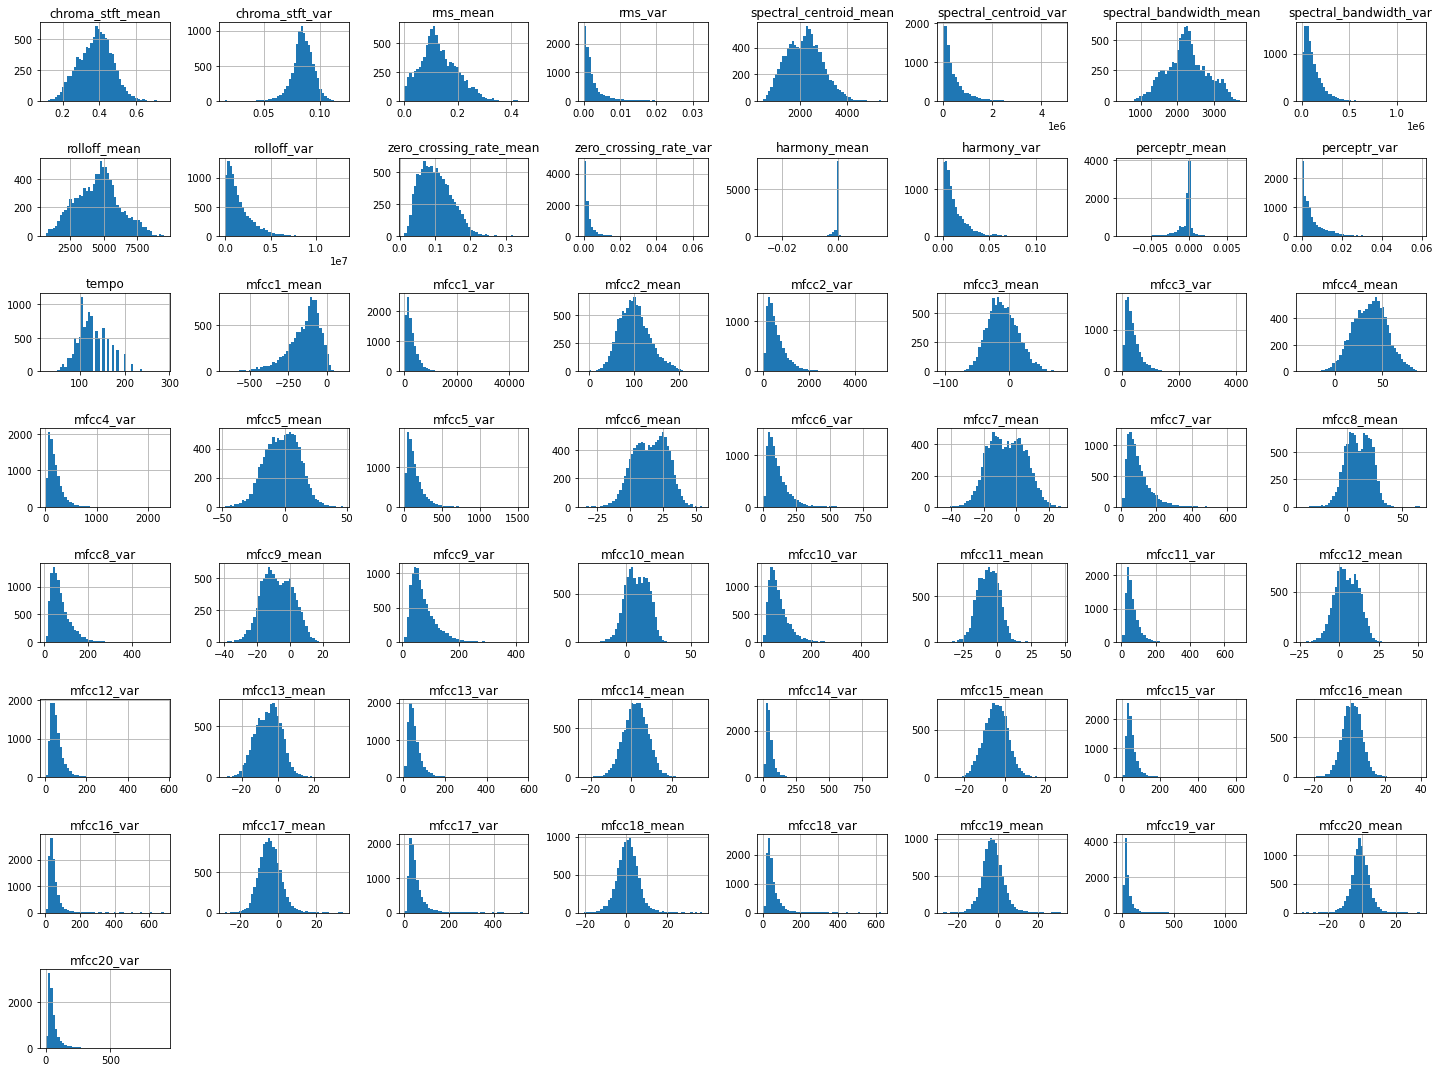

In [17]:
# How do distributions look like?
gtzan_features_df.iloc[:,2:].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [18]:
# check the skewness of data feature distributions,
# interested in only skewness coefficient bigger than 1.0 or smaller than -1.0, eventhough +-0.5 would already indicate
# light skewness

expl_df = gtzan_features_df.iloc[0:,1:59]
for column in expl_df.columns:
    a = expl_df[column].skew()
    if a < -1.0:
        print(f'left skewed column {column} skewness {a}')
    else:
        if a > 1.0:
            print(f'right skewed column {column} skewness {a}')
               

right skewed column rms_var skewness 3.0713396067286607
right skewed column spectral_centroid_var skewness 2.224998962908016
right skewed column spectral_bandwidth_var skewness 2.2637491935808254
right skewed column rolloff_var skewness 1.7150775571758832
right skewed column zero_crossing_rate_var skewness 3.8693019816724457
left skewed column harmony_mean skewness -6.184336807282665
right skewed column harmony_var skewness 2.0342641512133213
left skewed column perceptr_mean skewness -1.4696076751496991
right skewed column perceptr_var skewness 2.3099497069708503
left skewed column mfcc1_mean skewness -1.1135904237594159
right skewed column mfcc1_var skewness 3.682464059984569
right skewed column mfcc2_var skewness 2.104398197359448
right skewed column mfcc3_var skewness 2.3649192535185555
right skewed column mfcc4_var skewness 2.045457626709719
right skewed column mfcc5_var skewness 2.4105389778817554
right skewed column mfcc6_var skewness 1.9083247987026344
right skewed column mfcc7_

#### Outcome
<div class="alert alert-block alert-info">
    To notice from our gtzan features statistical summary and histograms:
    <br>
    - Values of some features are very different.
        -> Need for scaling features before feeding to machine learning models that care for distances, or use products of weights and input feature values.<br>
    - Shapes of histograms of many features are not 'bell' like normally distributed. That can limit correct usage of data analysis that require normal distribution. In such situation a transformation could be considered. Typical transformations to consider for right skewed distributions include square root(x), logarithm ln(x), and inverse fuction 1/x. Typical transformations to consider for left skewed distributions include mirroring and  square root(k-x), mirroring and logarithm ln(k-x), mirroring and inverse 1/(k-x).
    <br><br>
    - Since data scaling is useful for many models, it will be done to data sets after split to train, validation, and test sets using standard scaler.<br> 
    - For right skewed variables (mainly variances) taking logarithm is tryed in aim to normalise the distribution. 
<div/>

<a href = '#Introduction'>Back to Introduction</a>


## 3.3 Creating Train-, Validation-, and Test Sets  

At this stage a final test set is put aside in aim to avoid data leakage during further investigation and transformation of the feature data and later on model training.  

Task is to create a model with good classification performance and model generalization. Thus train and test sets should be representative of real life music samples it will classify.  The original data set contains music that has captured from different sources and formats and that sence could represent the diversity of music samples this classifier model would face in reality. The feature data set parts are from the same distribution.Here it is assumed that using stratified sampling i.e., providing samples of each music genre in equal number would support representativeness. In addition to avoid data leakage the train test splits are done using stratified group k fold to ensure that samples of one music piece are in either test or train sets but not in both. This principle is followed when splitting the data set into test and cross-validation parts.  

About the test set size: If the testset portion of all data is too large then there is less samples to use for fitting i.e. training and parameter tuning. This decreases the model performance. If the test set is too small then there is not enough data to gain statistically usefull results on model generalization estimation.  

First 20 % of the data samples are separated to form the final test set which is put aside. The rest 80 % (now called as X_train) is later split into smaller training and validation sets.  

This approch aims for positive effect on efficient data usage and model generalization performance. Information-, and data leakage and available dataset size has been considered.

Reprodusability by making sure set stays the same for every following run. This is established by giving a seed for random function. Later the processed train, validation, and test sets are saved on file. 


## Test set separation



#### Enabling grouping - needed to keep samples of same song in either training or test sets but not in both
 
Equal representations of genre classes in test and train sets and stopping info leagage by having the samples from the same song only either in training or testing set.

In [19]:
# create 'group' column that covers samples of same song
# in new column the group id is got by cutting the end of the cell value and leaving the actual song name

gtzan_features_df['group'] = gtzan_features_df['filename']    
column = 60

for row in range(gtzan_features_df.shape[0]):
    txt = gtzan_features_df.iloc[row,column]
    txt = txt.split('.')
    gtzan_features_df.iloc[row,column] = txt[0] + txt[1]


In [20]:
gtzan_features_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,...,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,group
0,blues.00000.0.wav,66149,0.3354,0.0910,0.1304,0.0035,1773.0650,167541.6309,1972.7444,117335.7716,3714.5604,1.0808e+06,0.0819,0.0006,-7.8485e-05,0.0084,-6.8162e-05,0.0055,129.1992,-118.6279,2440.2866,125.0836,260.9569,-23.4437,364.0817,41.3215,181.6949,-5.9761,152.9631,20.1151,...,-16.0454,40.2271,17.8552,84.3203,-14.6334,83.4372,10.2705,97.0013,-9.7083,66.6699,10.1839,45.1036,-4.6816,34.1695,8.4174,48.2694,-7.2335,42.7709,-2.8536,39.6871,-3.2413,36.4882,0.7222,38.0992,-5.0503,33.6181,-0.2430,43.7718,blues,blues00000
1,blues.00000.1.wav,66149,0.3431,0.0861,0.1127,0.0014,1816.6938,90525.6909,2010.0515,65671.8757,3869.6822,6.7224e+05,0.0872,0.0010,-9.8949e-05,0.0050,-1.0335e-04,0.0049,123.0469,-125.5907,2038.3442,122.4212,216.7742,-20.7180,231.9798,50.1284,142.7004,-11.3333,139.2431,21.3854,...,-15.9608,97.3640,19.4541,57.9481,-12.4659,68.2715,17.8982,56.2222,-11.7326,54.3739,8.1450,40.6629,-7.7178,30.8085,8.3972,48.7842,-8.3005,68.5848,4.0747,64.7483,-6.0553,40.6777,0.1590,51.2641,-2.8377,97.0308,5.7841,59.9431,blues,blues00000
2,blues.00000.2.wav,66149,0.3468,0.0922,0.1320,0.0046,1788.5397,111407.4376,2084.5651,75124.9217,3997.6392,7.9071e+05,0.0714,0.0004,-6.5642e-05,0.0125,6.5056e-05,0.0044,123.0469,-132.4419,3798.5322,115.0852,257.3213,-14.8117,192.4481,50.1893,144.1660,-0.6808,128.3769,24.6504,...,-13.5061,89.3193,15.6434,55.2540,-13.2166,120.3088,10.4060,35.7579,-7.9915,47.9116,11.8540,36.5699,-4.6777,40.7251,6.5711,30.6868,-2.4248,50.3135,4.8063,67.3366,-1.7686,28.3486,2.3788,45.7176,-1.9384,53.0508,2.5174,33.1051,blues,blues00000
3,blues.00000.3.wav,66149,0.3636,0.0869,0.1326,0.0024,1655.2890,111952.2845,1960.0400,82913.6393,3568.3002,9.2165e+05,0.0694,0.0003,-1.3757e-05,0.0083,1.8253e-05,0.0059,123.0469,-118.2311,2508.7810,132.1165,332.6506,-18.7583,109.3575,39.7693,184.6933,-13.2604,144.3982,20.4681,...,-14.5634,68.9373,18.7451,74.7489,-13.7555,73.8686,12.9938,41.5496,-12.6489,58.5405,10.3893,39.1020,-4.3627,60.7147,9.1562,40.4115,-9.8894,44.6663,-1.3591,47.7395,-3.8412,28.3371,1.2186,34.7709,-3.5804,50.8362,3.6309,32.0237,blues,blues00000
4,blues.00000.4.wav,66149,0.3356,0.0881,0.1433,0.0017,1630.6562,79667.2677,1948.5039,60204.0203,3469.9929,6.1021e+05,0.0701,0.0003,4.0539e-05,0.0096,-1.0598e-04,0.0058,123.0469,-105.9684,2118.9199,134.6436,219.5626,-19.9617,171.8788,40.1718,103.1207,-14.2719,102.6512,18.7346,...,-15.6194,48.5103,19.2080,53.6430,-18.2747,95.3010,14.3167,58.8212,-5.7922,55.0303,17.0454,43.2299,-5.6814,46.5153,5.7055,24.9562,-7.9861,39.8169,2.0929,30.3364,0.6646,45.8809,1.6894,51.3636,-3.3925,26.7388,0.5370,29.1467,blues,blues00000


In [21]:
gtzan_features_df.shape

(9990, 61)

In [22]:
gtzan_features_grp_df = gtzan_features_df.copy()

#### StratifiedGroupKFold method provides the needed:

In [23]:
# defining parameters needed for splitting method StratifiedGroupKFold
X_sgkf = gtzan_features_grp_df.iloc[:,2:].copy()
y_sgkf = X_sgkf.pop('label')
groups_sgkf = X_sgkf['group'].copy()

In [24]:
X_sgkf.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,group
0,0.3354,0.0910,0.1304,0.0035,1773.0650,167541.6309,1972.7444,117335.7716,3714.5604,1.0808e+06,0.0819,0.0006,-7.8485e-05,0.0084,-6.8162e-05,0.0055,129.1992,-118.6279,2440.2866,125.0836,260.9569,-23.4437,364.0817,41.3215,181.6949,-5.9761,152.9631,20.1151,75.6523,-16.0454,40.2271,17.8552,84.3203,-14.6334,83.4372,10.2705,97.0013,-9.7083,66.6699,10.1839,45.1036,-4.6816,34.1695,8.4174,48.2694,-7.2335,42.7709,-2.8536,39.6871,-3.2413,36.4882,0.7222,38.0992,-5.0503,33.6181,-0.2430,43.7718,blues00000
1,0.3431,0.0861,0.1127,0.0014,1816.6938,90525.6909,2010.0515,65671.8757,3869.6822,6.7224e+05,0.0872,0.0010,-9.8949e-05,0.0050,-1.0335e-04,0.0049,123.0469,-125.5907,2038.3442,122.4212,216.7742,-20.7180,231.9798,50.1284,142.7004,-11.3333,139.2431,21.3854,77.8179,-15.9608,97.3640,19.4541,57.9481,-12.4659,68.2715,17.8982,56.2222,-11.7326,54.3739,8.1450,40.6629,-7.7178,30.8085,8.3972,48.7842,-8.3005,68.5848,4.0747,64.7483,-6.0553,40.6777,0.1590,51.2641,-2.8377,97.0308,5.7841,59.9431,blues00000
2,0.3468,0.0922,0.1320,0.0046,1788.5397,111407.4376,2084.5651,75124.9217,3997.6392,7.9071e+05,0.0714,0.0004,-6.5642e-05,0.0125,6.5056e-05,0.0044,123.0469,-132.4419,3798.5322,115.0852,257.3213,-14.8117,192.4481,50.1893,144.1660,-0.6808,128.3769,24.6504,66.3712,-13.5061,89.3193,15.6434,55.2540,-13.2166,120.3088,10.4060,35.7579,-7.9915,47.9116,11.8540,36.5699,-4.6777,40.7251,6.5711,30.6868,-2.4248,50.3135,4.8063,67.3366,-1.7686,28.3486,2.3788,45.7176,-1.9384,53.0508,2.5174,33.1051,blues00000
3,0.3636,0.0869,0.1326,0.0024,1655.2890,111952.2845,1960.0400,82913.6393,3568.3002,9.2165e+05,0.0694,0.0003,-1.3757e-05,0.0083,1.8253e-05,0.0059,123.0469,-118.2311,2508.7810,132.1165,332.6506,-18.7583,109.3575,39.7693,184.6933,-13.2604,144.3982,20.4681,122.5165,-14.5634,68.9373,18.7451,74.7489,-13.7555,73.8686,12.9938,41.5496,-12.6489,58.5405,10.3893,39.1020,-4.3627,60.7147,9.1562,40.4115,-9.8894,44.6663,-1.3591,47.7395,-3.8412,28.3371,1.2186,34.7709,-3.5804,50.8362,3.6309,32.0237,blues00000
4,0.3356,0.0881,0.1433,0.0017,1630.6562,79667.2677,1948.5039,60204.0203,3469.9929,6.1021e+05,0.0701,0.0003,4.0539e-05,0.0096,-1.0598e-04,0.0058,123.0469,-105.9684,2118.9199,134.6436,219.5626,-19.9617,171.8788,40.1718,103.1207,-14.2719,102.6512,18.7346,79.0700,-15.6194,48.5103,19.2080,53.6430,-18.2747,95.3010,14.3167,58.8212,-5.7922,55.0303,17.0454,43.2299,-5.6814,46.5153,5.7055,24.9562,-7.9861,39.8169,2.0929,30.3364,0.6646,45.8809,1.6894,51.3636,-3.3925,26.7388,0.5370,29.1467,blues00000


In [25]:
y_sgkf.head()

0    blues
1    blues
2    blues
3    blues
4    blues
Name: label, dtype: object

In [26]:
groups_sgkf.head()

0    blues00000
1    blues00000
2    blues00000
3    blues00000
4    blues00000
Name: group, dtype: object

In [27]:
print(f'X_sgkf {type(X_sgkf)} shape {X_sgkf.shape}')
print(f'y_sgkf {type(y_sgkf)} shape {y_sgkf.shape}')
print(f'groups_sgkf {type(X_sgkf)} shape {groups_sgkf.shape}')

X_sgkf <class 'pandas.core.frame.DataFrame'> shape (9990, 58)
y_sgkf <class 'pandas.core.series.Series'> shape (9990,)
groups_sgkf <class 'pandas.core.frame.DataFrame'> shape (9990,)


In [28]:
# creating stratified kfold iterator object
sgkf = StratifiedGroupKFold(n_splits=5, shuffle= True, random_state= rng)
sgkf.get_n_splits(X=X_sgkf, y=y_sgkf, groups=groups_sgkf)

5

In [29]:
# now splitting the data set using split method of StratifiedGroupKFold which
# keeps samples of same song (group) in either in test set or training set. (avoiding info leakage)

for train_idx_sgkf, test_idx_sgkf in sgkf.split(X_sgkf, y_sgkf, groups_sgkf):
    print("TRAIN:", train_idx_sgkf, "TEST:", test_idx_sgkf)

TRAIN: [  10   11   12 ... 9987 9988 9989] TEST: [   0    1    2 ... 9977 9978 9979]
TRAIN: [   0    1    2 ... 9987 9988 9989] TEST: [  10   11   12 ... 9957 9958 9959]
TRAIN: [   0    1    2 ... 9977 9978 9979] TEST: [  20   21   22 ... 9987 9988 9989]
TRAIN: [   0    1    2 ... 9987 9988 9989] TEST: [  30   31   32 ... 9967 9968 9969]
TRAIN: [   0    1    2 ... 9987 9988 9989] TEST: [  40   41   42 ... 9947 9948 9949]


In [30]:
# creating test_set and train set using these indexes
X_train_sgkf = X_sgkf.loc[train_idx_sgkf].copy()
y_train_sgkf = y_sgkf.loc[train_idx_sgkf].copy()
X_test_sgkf = X_sgkf.loc[test_idx_sgkf].copy()
y_test_sgkf = y_sgkf.loc[test_idx_sgkf].copy()

In [31]:
X_train_sgkf.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,group
0,0.3354,0.0910,0.1304,0.0035,1773.0650,167541.6309,1972.7444,117335.7716,3714.5604,1.0808e+06,0.0819,0.0006,-7.8485e-05,0.0084,-6.8162e-05,0.0055,129.1992,-118.6279,2440.2866,125.0836,260.9569,-23.4437,364.0817,41.3215,181.6949,-5.9761,152.9631,20.1151,75.6523,-16.0454,40.2271,17.8552,84.3203,-14.6334,83.4372,10.2705,97.0013,-9.7083,66.6699,10.1839,45.1036,-4.6816,34.1695,8.4174,48.2694,-7.2335,42.7709,-2.8536,39.6871,-3.2413,36.4882,0.7222,38.0992,-5.0503,33.6181,-0.2430,43.7718,blues00000
1,0.3431,0.0861,0.1127,0.0014,1816.6938,90525.6909,2010.0515,65671.8757,3869.6822,6.7224e+05,0.0872,0.0010,-9.8949e-05,0.0050,-1.0335e-04,0.0049,123.0469,-125.5907,2038.3442,122.4212,216.7742,-20.7180,231.9798,50.1284,142.7004,-11.3333,139.2431,21.3854,77.8179,-15.9608,97.3640,19.4541,57.9481,-12.4659,68.2715,17.8982,56.2222,-11.7326,54.3739,8.1450,40.6629,-7.7178,30.8085,8.3972,48.7842,-8.3005,68.5848,4.0747,64.7483,-6.0553,40.6777,0.1590,51.2641,-2.8377,97.0308,5.7841,59.9431,blues00000
2,0.3468,0.0922,0.1320,0.0046,1788.5397,111407.4376,2084.5651,75124.9217,3997.6392,7.9071e+05,0.0714,0.0004,-6.5642e-05,0.0125,6.5056e-05,0.0044,123.0469,-132.4419,3798.5322,115.0852,257.3213,-14.8117,192.4481,50.1893,144.1660,-0.6808,128.3769,24.6504,66.3712,-13.5061,89.3193,15.6434,55.2540,-13.2166,120.3088,10.4060,35.7579,-7.9915,47.9116,11.8540,36.5699,-4.6777,40.7251,6.5711,30.6868,-2.4248,50.3135,4.8063,67.3366,-1.7686,28.3486,2.3788,45.7176,-1.9384,53.0508,2.5174,33.1051,blues00000
3,0.3636,0.0869,0.1326,0.0024,1655.2890,111952.2845,1960.0400,82913.6393,3568.3002,9.2165e+05,0.0694,0.0003,-1.3757e-05,0.0083,1.8253e-05,0.0059,123.0469,-118.2311,2508.7810,132.1165,332.6506,-18.7583,109.3575,39.7693,184.6933,-13.2604,144.3982,20.4681,122.5165,-14.5634,68.9373,18.7451,74.7489,-13.7555,73.8686,12.9938,41.5496,-12.6489,58.5405,10.3893,39.1020,-4.3627,60.7147,9.1562,40.4115,-9.8894,44.6663,-1.3591,47.7395,-3.8412,28.3371,1.2186,34.7709,-3.5804,50.8362,3.6309,32.0237,blues00000
4,0.3356,0.0881,0.1433,0.0017,1630.6562,79667.2677,1948.5039,60204.0203,3469.9929,6.1021e+05,0.0701,0.0003,4.0539e-05,0.0096,-1.0598e-04,0.0058,123.0469,-105.9684,2118.9199,134.6436,219.5626,-19.9617,171.8788,40.1718,103.1207,-14.2719,102.6512,18.7346,79.0700,-15.6194,48.5103,19.2080,53.6430,-18.2747,95.3010,14.3167,58.8212,-5.7922,55.0303,17.0454,43.2299,-5.6814,46.5153,5.7055,24.9562,-7.9861,39.8169,2.0929,30.3364,0.6646,45.8809,1.6894,51.3636,-3.3925,26.7388,0.5370,29.1467,blues00000


In [32]:
print(f'X_train_sgkf {type(X_train_sgkf)} shape {X_train_sgkf.shape}')
print(f'y_train_sgkf {type(y_train_sgkf)} shape {y_train_sgkf.shape}')
print(f'X_test_sgkf {type(X_test_sgkf)} shape {X_test_sgkf.shape}')
print(f'y_test_sgkf {type(y_test_sgkf)} shape {y_test_sgkf.shape}')

X_train_sgkf <class 'pandas.core.frame.DataFrame'> shape (7991, 58)
y_train_sgkf <class 'pandas.core.series.Series'> shape (7991,)
X_test_sgkf <class 'pandas.core.frame.DataFrame'> shape (1999, 58)
y_test_sgkf <class 'pandas.core.series.Series'> shape (1999,)



#### The rest of original feature data set is to be split into training and validation sets.


In [33]:
# defining parameters for StratifiedGroupKFold
X_train_sgkf_ph2 = X_train_sgkf.copy()
y_train_sgkf_ph2 = y_train_sgkf.copy()
groups_sgkf_ph2 = X_train_sgkf.iloc[:,-1].copy()

In [34]:
print(f'X_train_sgkf_ph2 {type(X_train_sgkf_ph2)} shape {X_train_sgkf_ph2.shape}')
print(f'y_train_sgkf_ph2 {type(y_train_sgkf_ph2)} shape {y_train_sgkf_ph2.shape}')
print(f'groups_sgkf_ph2 {type(groups_sgkf_ph2)} shape {groups_sgkf_ph2.shape}')

X_train_sgkf_ph2 <class 'pandas.core.frame.DataFrame'> shape (7991, 58)
y_train_sgkf_ph2 <class 'pandas.core.series.Series'> shape (7991,)
groups_sgkf_ph2 <class 'pandas.core.series.Series'> shape (7991,)


In [35]:
# creating stratified kfold iterator object for the second split aiming to separate training and val sets
sgkf2 = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=rng) # to get final total split test 20%,val 20%,training 60%
sgkf2.get_n_splits(X=X_train_sgkf_ph2, y=y_train_sgkf_ph2, groups=groups_sgkf_ph2)

4

In [36]:
# now splitting the data set using split method of StratifiedGroupKFold class and
# keeping samples of same song in either in test set or training set. (avoiding info leakage)

for training_idx_sgkf, val_idx_sgkf in sgkf2.split(X_train_sgkf_ph2, y_train_sgkf_ph2, groups_sgkf_ph2):
    print("TRAINING:", training_idx_sgkf, "VAL:", val_idx_sgkf)

print('training set index array:',training_idx_sgkf.shape, type(training_idx_sgkf))
print('val set index array:',val_idx_sgkf.shape, type(val_idx_sgkf))

TRAINING: [  10   11   12 ... 7988 7989 7990] VAL: [   0    1    2 ... 7968 7969 7970]
TRAINING: [   0    1    2 ... 7988 7989 7990] VAL: [  10   11   12 ... 7928 7929 7930]
TRAINING: [   0    1    2 ... 7988 7989 7990] VAL: [  20   21   22 ... 7958 7959 7960]
TRAINING: [   0    1    2 ... 7968 7969 7970] VAL: [  30   31   32 ... 7988 7989 7990]
training set index array: (6003,) <class 'numpy.ndarray'>
val set index array: (1988,) <class 'numpy.ndarray'>


In [37]:
# creating test_set and train set using these indexes
X_training_sgkf = X_train_sgkf_ph2.iloc[training_idx_sgkf].copy()
y_training_sgkf = y_train_sgkf_ph2.iloc[training_idx_sgkf].copy()

X_val_sgkf = X_train_sgkf_ph2.iloc[val_idx_sgkf].copy()
y_val_sgkf = y_train_sgkf_ph2.iloc[val_idx_sgkf].copy()

In [38]:
print(f'X_training_sgkf {type(X_training_sgkf)} shape {X_training_sgkf.shape}')
print(f'y_training_sgkf {type(y_training_sgkf)} shape {y_training_sgkf.shape}')
print()
print(f'X_val_sgkf {type(X_val_sgkf)} shape {X_val_sgkf.shape}')
print(f'y_val_sgkf {type(y_val_sgkf)} shape {y_val_sgkf.shape}')

X_training_sgkf <class 'pandas.core.frame.DataFrame'> shape (6003, 58)
y_training_sgkf <class 'pandas.core.series.Series'> shape (6003,)

X_val_sgkf <class 'pandas.core.frame.DataFrame'> shape (1988, 58)
y_val_sgkf <class 'pandas.core.series.Series'> shape (1988,)


In [39]:
# the result of data set splits: original set was devided into three parts test, val, and training,
# where val + training = train, and train + test = original set
X_test = X_test_sgkf.copy()
X_train = X_train_sgkf.copy()
X_training = X_training_sgkf.copy()
X_val = X_val_sgkf.copy()

y_test = y_test_sgkf.copy()
y_train = y_train_sgkf.copy()
y_training = y_training_sgkf.copy()
y_val = y_val_sgkf.copy()

In [40]:
print('Outcome of data set splits')
print(f'  The source feature data set shape is {gtzan_features_3_sec_df.shape} from which length and name columns are to be dropped.')
print(f'  Testing sets X_test shape is {X_test.shape} and y_test shape is {y_test.shape}')
print(f'  Major training set X_train set shape is {X_train.shape} and y_train shape is {y_train.shape}')
print(f'  Minor training set X_training set shape is {X_training.shape} and y_training shape is {y_training.shape}')
print(f'  Validation set X_val set shape is {X_val.shape} y_val shape is {y_val.shape}')

Outcome of data set splits
  The source feature data set shape is (9990, 60) from which length and name columns are to be dropped.
  Testing sets X_test shape is (1999, 58) and y_test shape is (1999,)
  Major training set X_train set shape is (7991, 58) and y_train shape is (7991,)
  Minor training set X_training set shape is (6003, 58) and y_training shape is (6003,)
  Validation set X_val set shape is (1988, 58) y_val shape is (1988,)


<div class="alert alert-block alert-info">
    Training-, validation-, and test set have equal number of samples representing different music genres. In that sence sets used for training, validation, and testing represent nicely the whole data set which consisted of about 1000 samples of each ten music genres included. This is important when considering the data representativiness. Data representativiness is important for classifier performance.
</div>

#### Outcome - Now the dataset is devided into training, validation, and test sets.

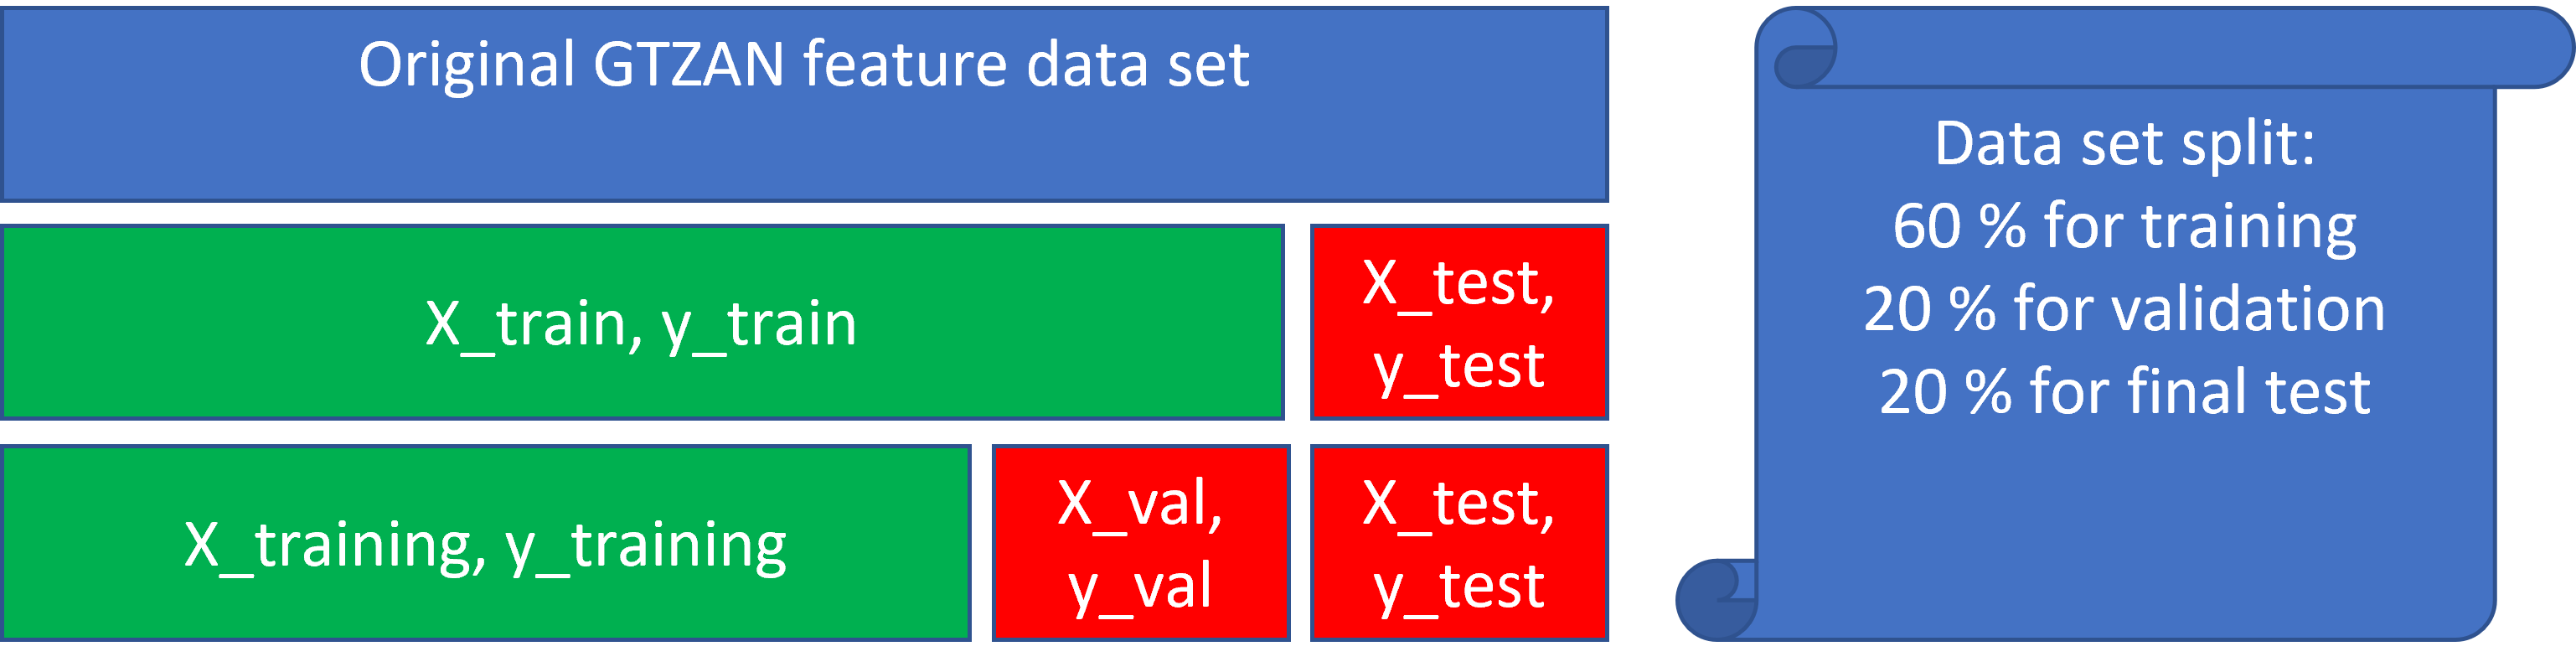

<a href = '#Introduction'>Back to Introduction</a>


## 3.4 Discovering Feature Data

Now dealing with the feature data which exludes the test and validation sets.

In [41]:
# making a exploration copy of feature data without test data
X_training_expl = X_training.copy()
y_training_expl = y_training.copy()
Xy_training_expl = X_training_expl.join(y_training_expl)
print('Shape of total Xy_training set with features and label is:', Xy_training_expl.shape)

Shape of total Xy_training set with features and label is: (6003, 59)


In [42]:
print(X_training_expl.shape, type(X_training_expl))
print(y_training_expl.shape, type(y_training_expl))

(6003, 58) <class 'pandas.core.frame.DataFrame'>
(6003,) <class 'pandas.core.series.Series'>


In [43]:
Xy_training_expl.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,group,label
0,0.3354,0.0910,0.1304,0.0035,1773.0650,167541.6309,1972.7444,117335.7716,3714.5604,1.0808e+06,0.0819,0.0006,-7.8485e-05,0.0084,-6.8162e-05,0.0055,129.1992,-118.6279,2440.2866,125.0836,260.9569,-23.4437,364.0817,41.3215,181.6949,-5.9761,152.9631,20.1151,75.6523,-16.0454,40.2271,17.8552,84.3203,-14.6334,83.4372,10.2705,97.0013,-9.7083,66.6699,10.1839,45.1036,-4.6816,34.1695,8.4174,48.2694,-7.2335,42.7709,-2.8536,39.6871,-3.2413,36.4882,0.7222,38.0992,-5.0503,33.6181,-0.2430,43.7718,blues00000,blues
1,0.3431,0.0861,0.1127,0.0014,1816.6938,90525.6909,2010.0515,65671.8757,3869.6822,6.7224e+05,0.0872,0.0010,-9.8949e-05,0.0050,-1.0335e-04,0.0049,123.0469,-125.5907,2038.3442,122.4212,216.7742,-20.7180,231.9798,50.1284,142.7004,-11.3333,139.2431,21.3854,77.8179,-15.9608,97.3640,19.4541,57.9481,-12.4659,68.2715,17.8982,56.2222,-11.7326,54.3739,8.1450,40.6629,-7.7178,30.8085,8.3972,48.7842,-8.3005,68.5848,4.0747,64.7483,-6.0553,40.6777,0.1590,51.2641,-2.8377,97.0308,5.7841,59.9431,blues00000,blues
2,0.3468,0.0922,0.1320,0.0046,1788.5397,111407.4376,2084.5651,75124.9217,3997.6392,7.9071e+05,0.0714,0.0004,-6.5642e-05,0.0125,6.5056e-05,0.0044,123.0469,-132.4419,3798.5322,115.0852,257.3213,-14.8117,192.4481,50.1893,144.1660,-0.6808,128.3769,24.6504,66.3712,-13.5061,89.3193,15.6434,55.2540,-13.2166,120.3088,10.4060,35.7579,-7.9915,47.9116,11.8540,36.5699,-4.6777,40.7251,6.5711,30.6868,-2.4248,50.3135,4.8063,67.3366,-1.7686,28.3486,2.3788,45.7176,-1.9384,53.0508,2.5174,33.1051,blues00000,blues
3,0.3636,0.0869,0.1326,0.0024,1655.2890,111952.2845,1960.0400,82913.6393,3568.3002,9.2165e+05,0.0694,0.0003,-1.3757e-05,0.0083,1.8253e-05,0.0059,123.0469,-118.2311,2508.7810,132.1165,332.6506,-18.7583,109.3575,39.7693,184.6933,-13.2604,144.3982,20.4681,122.5165,-14.5634,68.9373,18.7451,74.7489,-13.7555,73.8686,12.9938,41.5496,-12.6489,58.5405,10.3893,39.1020,-4.3627,60.7147,9.1562,40.4115,-9.8894,44.6663,-1.3591,47.7395,-3.8412,28.3371,1.2186,34.7709,-3.5804,50.8362,3.6309,32.0237,blues00000,blues
4,0.3356,0.0881,0.1433,0.0017,1630.6562,79667.2677,1948.5039,60204.0203,3469.9929,6.1021e+05,0.0701,0.0003,4.0539e-05,0.0096,-1.0598e-04,0.0058,123.0469,-105.9684,2118.9199,134.6436,219.5626,-19.9617,171.8788,40.1718,103.1207,-14.2719,102.6512,18.7346,79.0700,-15.6194,48.5103,19.2080,53.6430,-18.2747,95.3010,14.3167,58.8212,-5.7922,55.0303,17.0454,43.2299,-5.6814,46.5153,5.7055,24.9562,-7.9861,39.8169,2.0929,30.3364,0.6646,45.8809,1.6894,51.3636,-3.3925,26.7388,0.5370,29.1467,blues00000,blues



#### How about correlations?

- Checking features against target might give insights on valuable patterns  
- Checking correlations between features is not so valuable, but might give insights on which features to drop, maybe?


#### Deeper look at features - are they all equally valuable for identifying genre? What kind of thoughts arise from visualization


chroma_stft_mean


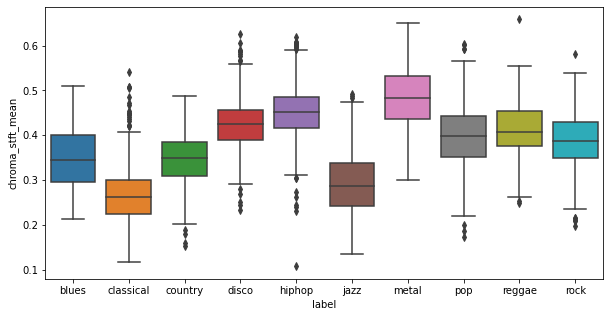

chroma_stft_var


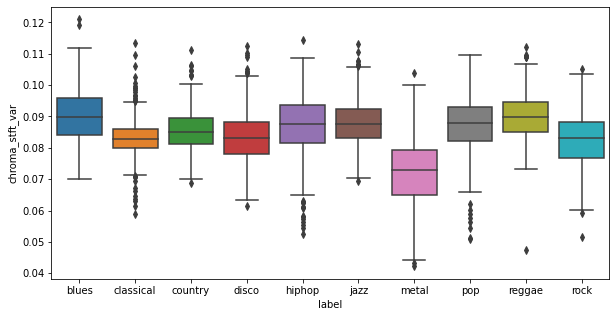

rms_mean


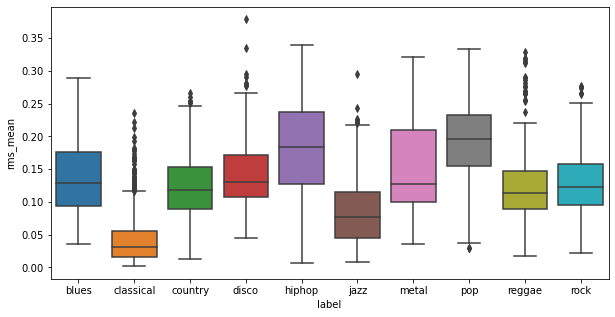

rms_var


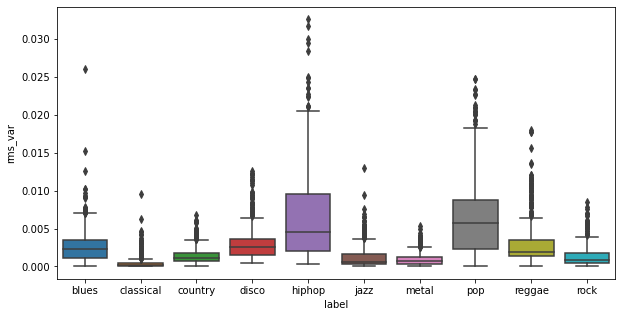

spectral_centroid_mean


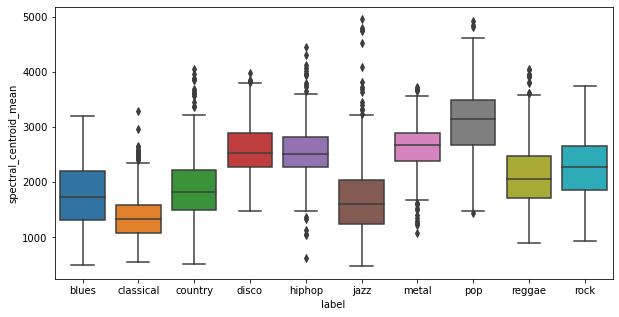

spectral_centroid_var


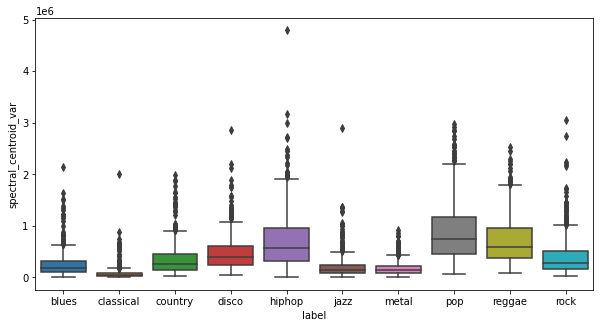

spectral_bandwidth_mean


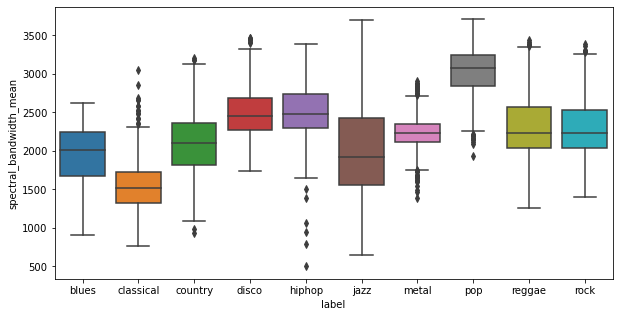

spectral_bandwidth_var


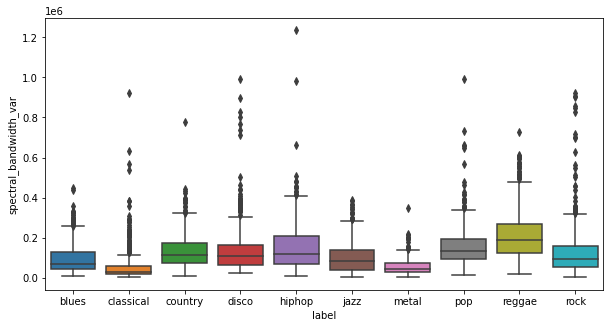

rolloff_mean


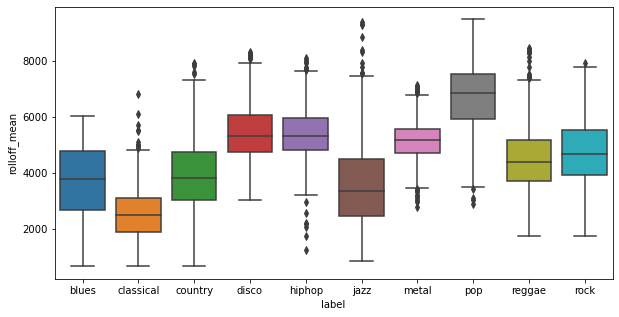

rolloff_var


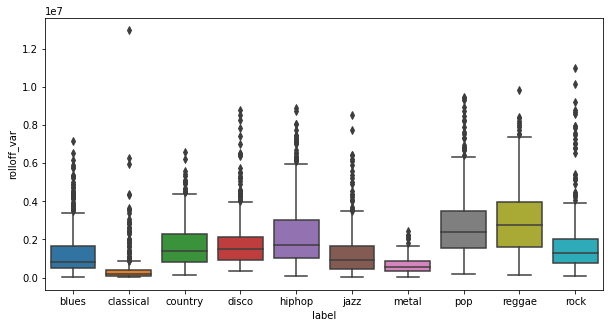

zero_crossing_rate_mean


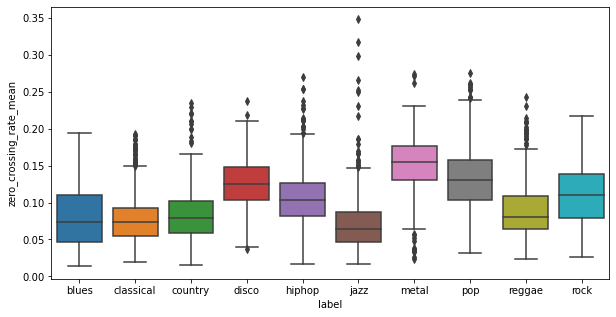

zero_crossing_rate_var


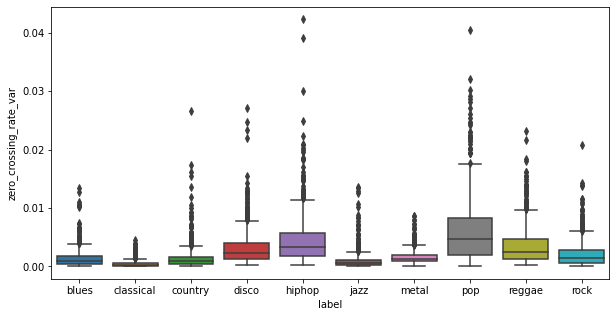

harmony_mean


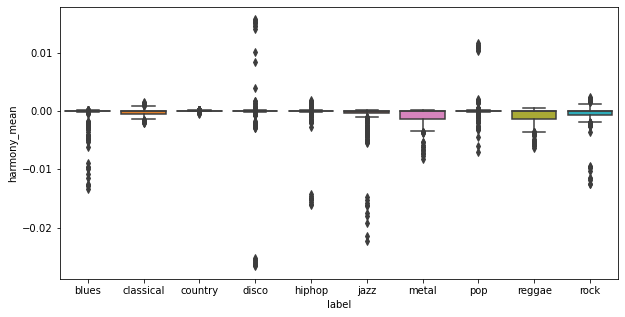

harmony_var


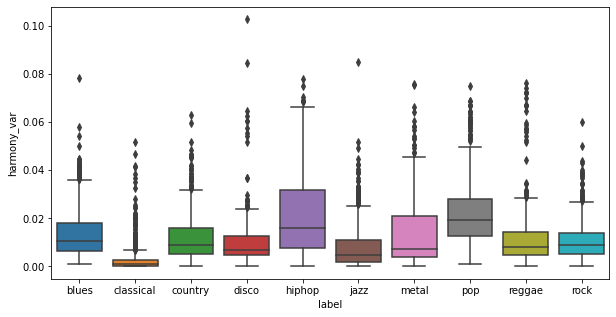

perceptr_mean


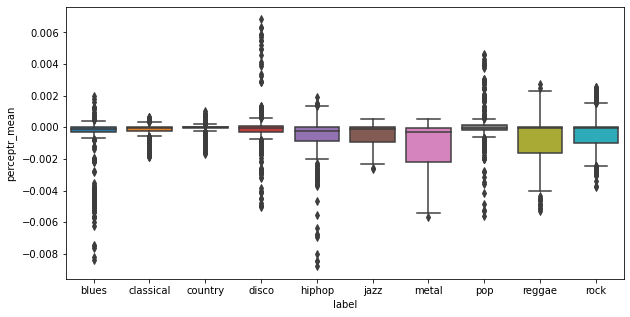

perceptr_var


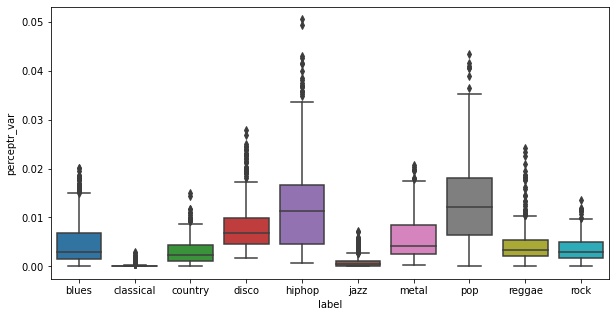

tempo


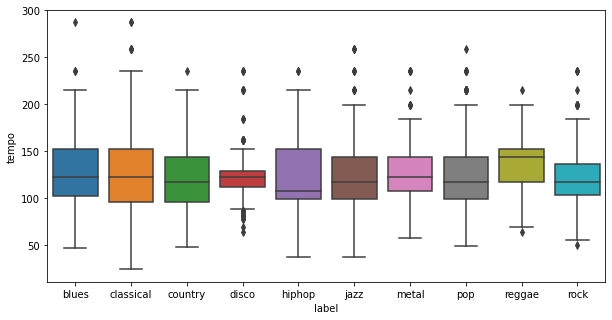

mfcc1_mean


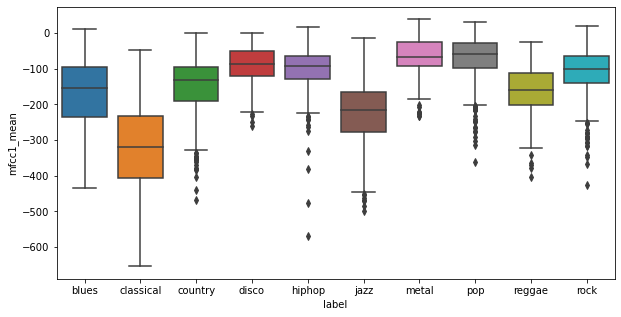

mfcc1_var


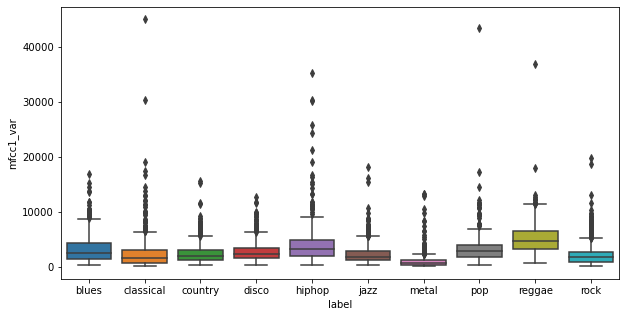

mfcc2_mean


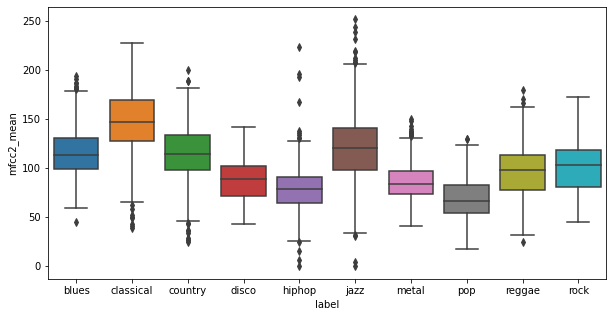

mfcc2_var


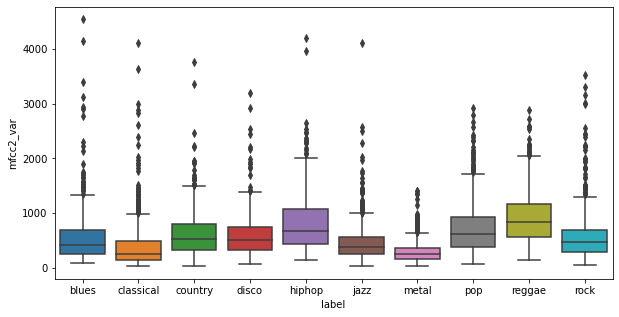

mfcc3_mean


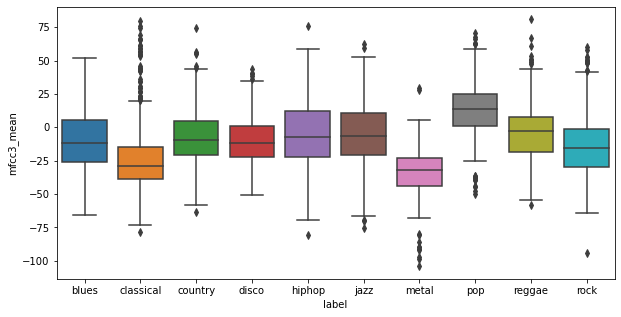

mfcc3_var


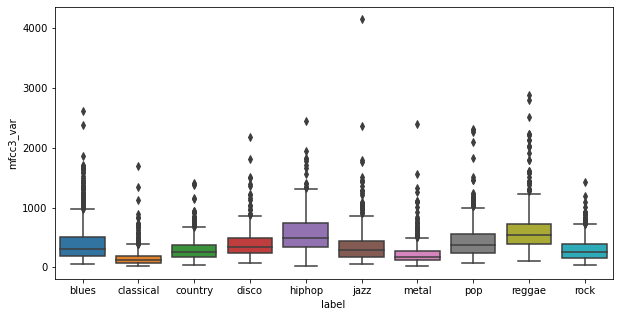

mfcc4_mean


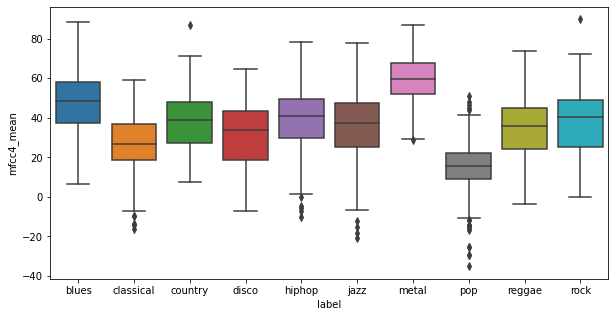

mfcc4_var


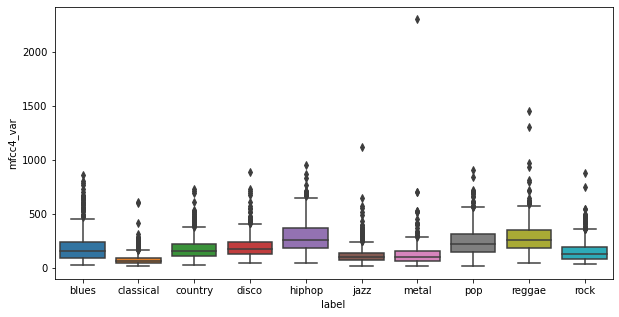

mfcc5_mean


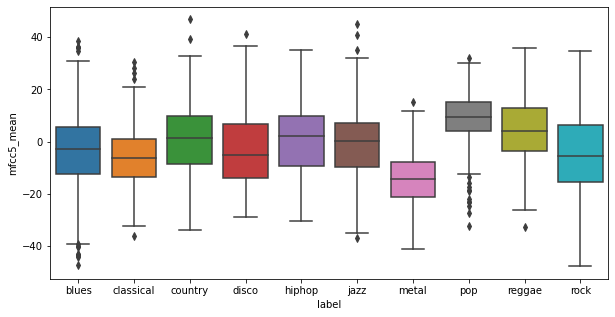

mfcc5_var


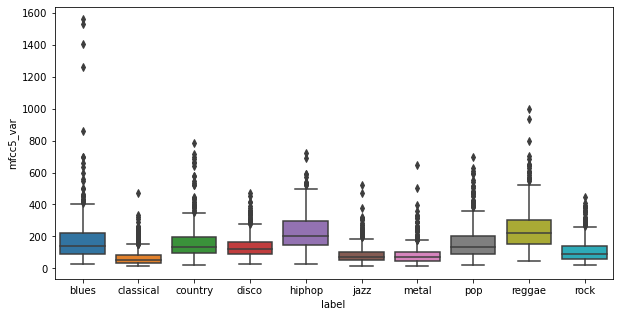

mfcc6_mean


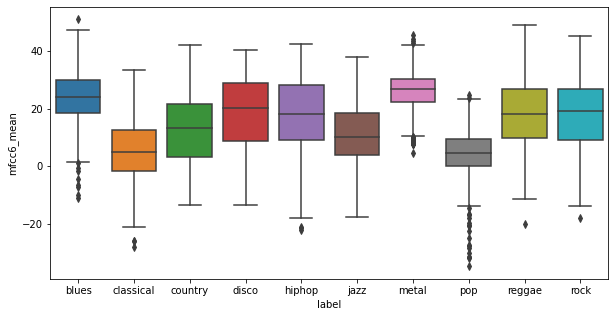

mfcc6_var


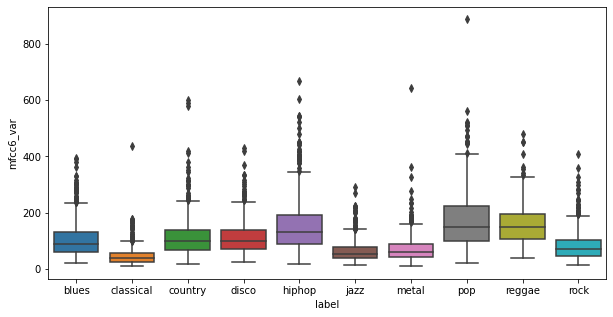

mfcc7_mean


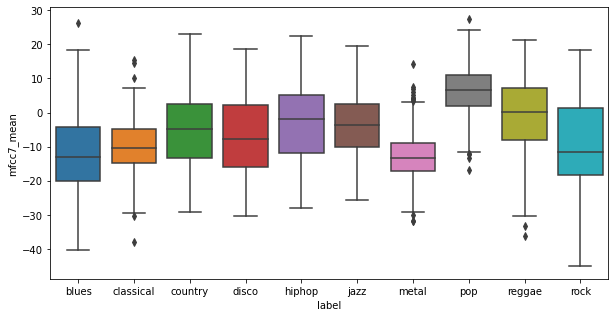

mfcc7_var


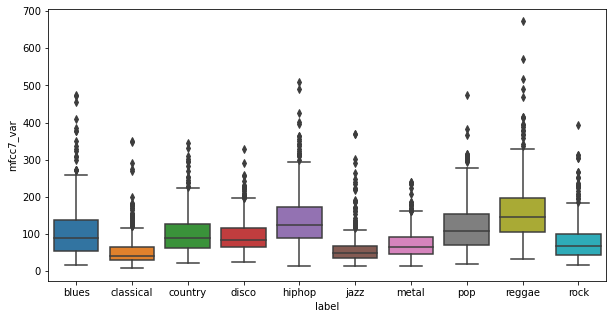

mfcc8_mean


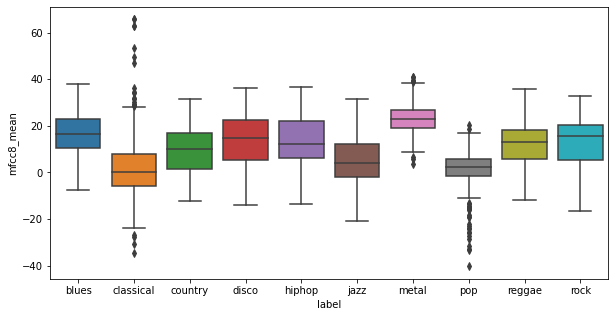

mfcc8_var


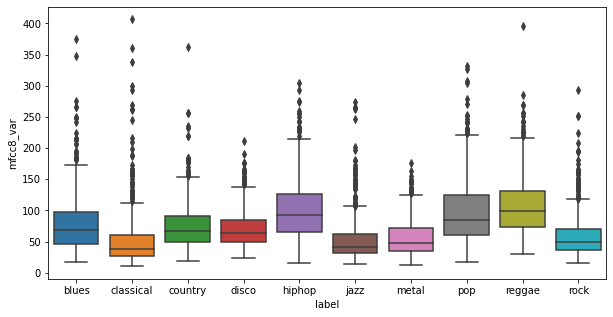

mfcc9_mean


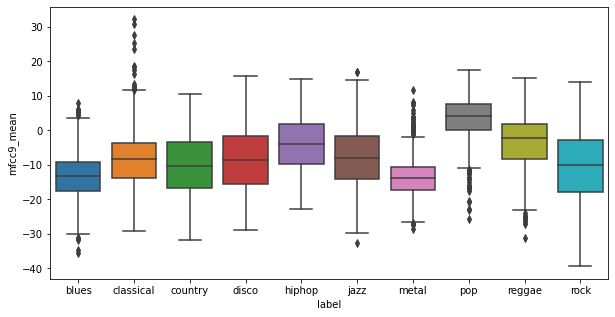

mfcc9_var


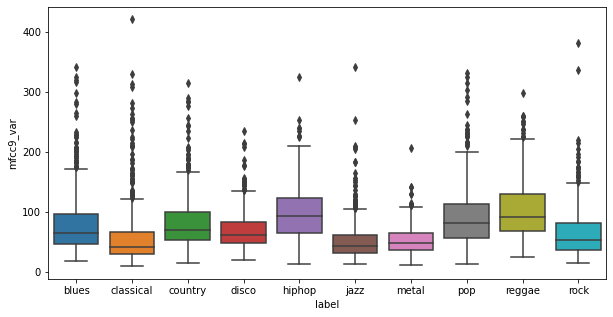

mfcc10_mean


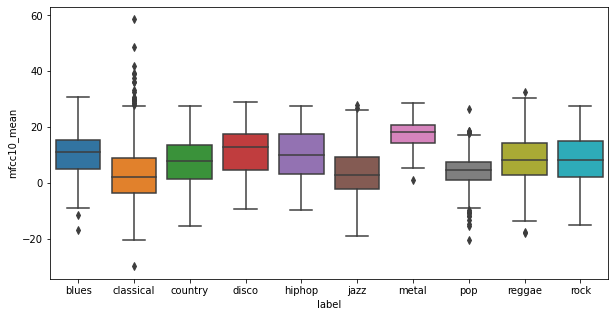

mfcc10_var


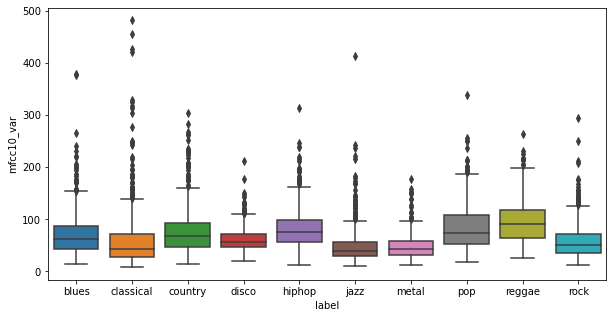

mfcc11_mean


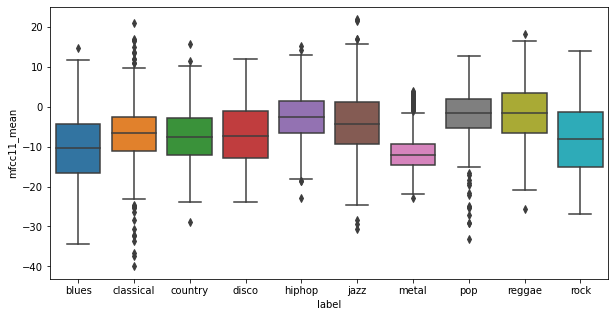

mfcc11_var


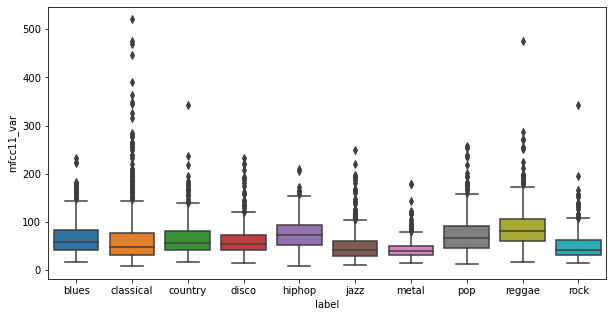

mfcc12_mean


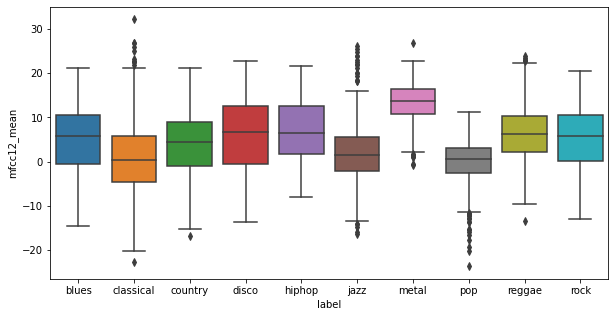

mfcc12_var


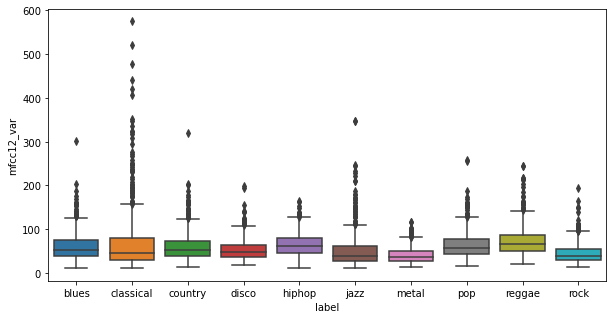

mfcc13_mean


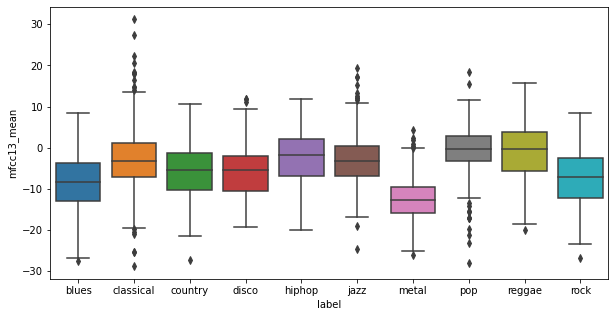

mfcc13_var


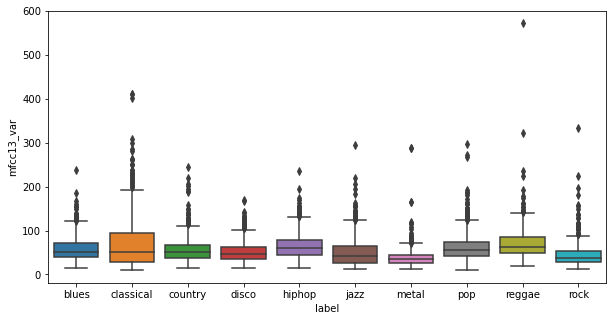

mfcc14_mean


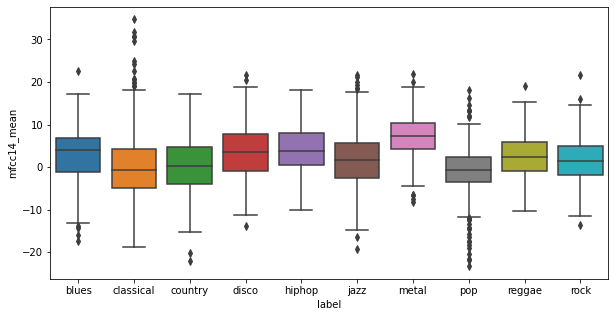

mfcc14_var


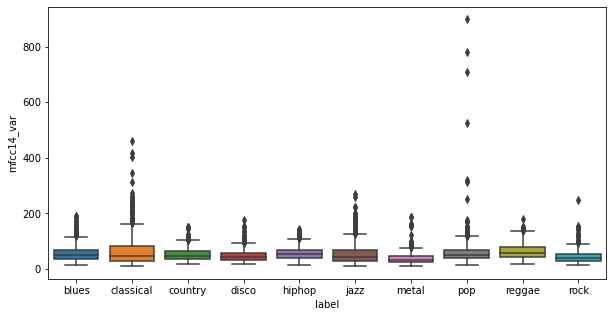

mfcc15_mean


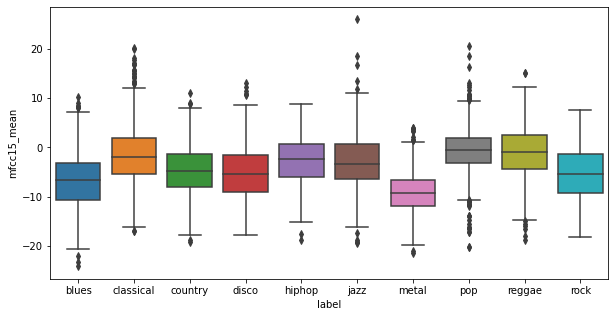

mfcc15_var


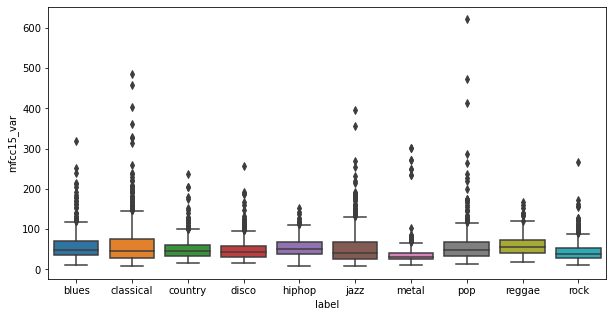

mfcc16_mean


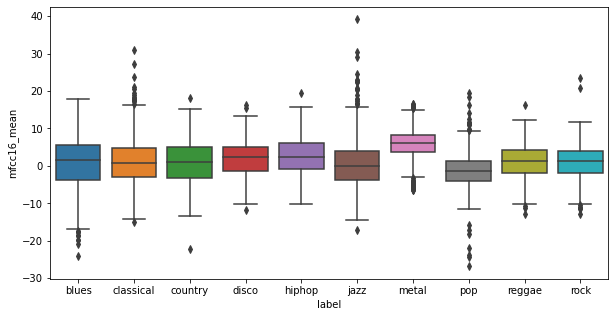

mfcc16_var


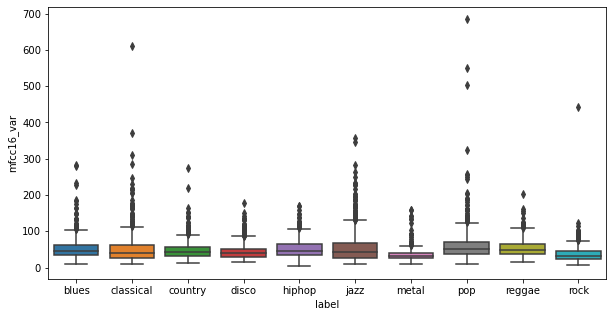

mfcc17_mean


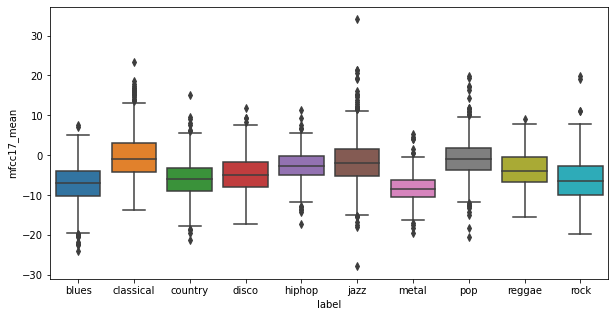

mfcc17_var


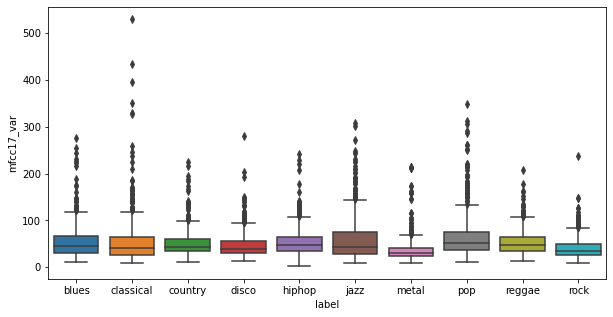

mfcc18_mean


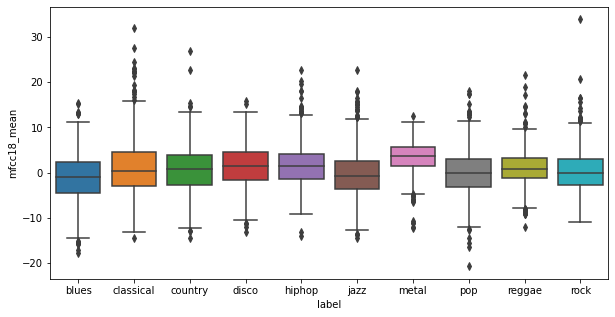

mfcc18_var


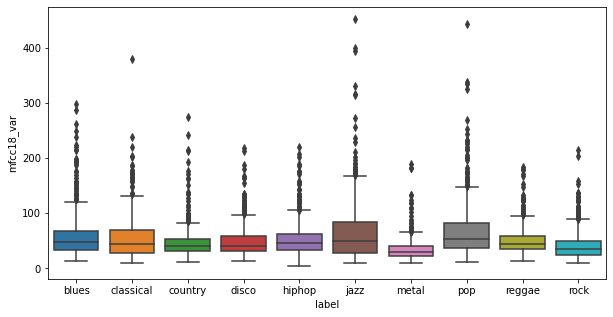

mfcc19_mean


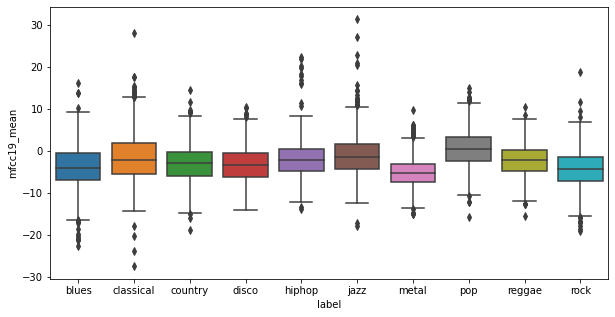

mfcc19_var


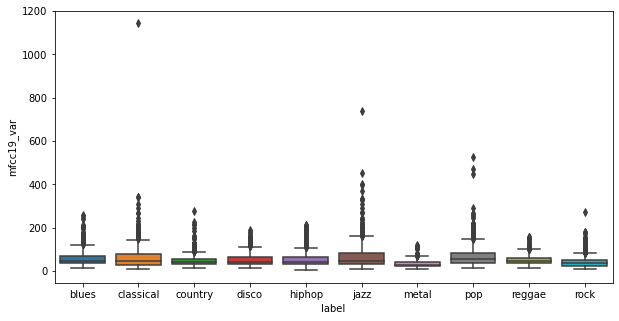

mfcc20_mean


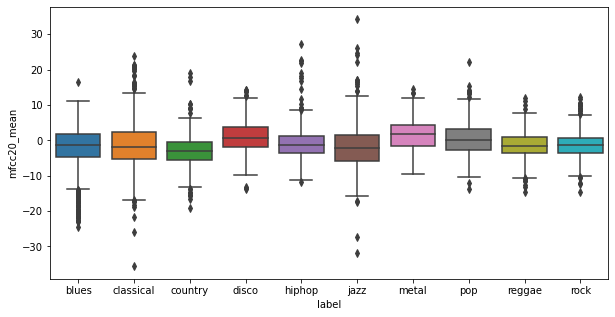

mfcc20_var


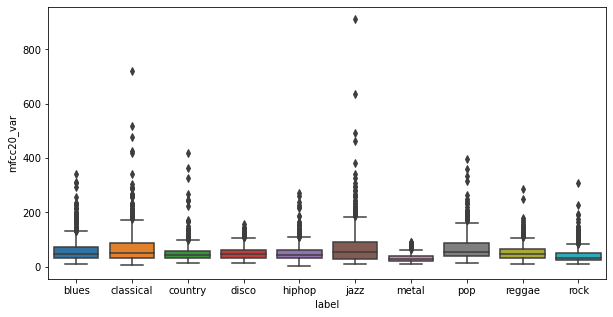

In [44]:
X_training_wog_df = X_training_expl.drop(['group'],axis=1)

for feature in X_training_wog_df.columns:
    f, ax = plt.subplots(figsize=(10, 5))
    print(feature)
    sns.boxplot(x=Xy_training_expl.label, y=X_training_wog_df.loc[:,feature])
    plt.show()

del X_training_wog_df


#### Any thoughts or insights from the boxplots abowe that show how the value distributions of features is related to genres?

These look a bit different than the same using 30 second samples. Here are more sample values out of the mid 50 % of each feature's distribution.  These zoom in time and show more differencies. Possibly will lead to better results.

Figures show that some features are better separating some genres than others. Just by looking at the above boxplots, it is hard to find any clear genre separating patterns that would separate all genres from all other.  

Hard to do any conclusions without deeper understanding, but it seems that atleast tempo alone does not separate genres. That is intuitive and the distibutions are heavily overlapping eachother.  

The feature distributions were quite much overlapping on the boxplots. That indicates cumbersome classification task.


#### No use to calculate feature correlations?

For being able to calculate correlations variables should have normal distribution and be non categorical. Here the variable variances are right skewed.  

In this project target is categorical ( music genre). Thus in this project correlation investigations are not available for investigating dependendies between independent feature variable and the dependent variable (genre).  

How about:  
- Transforming labels to one hot coding and then looking at correlation ratios those have with features. Unfortunately this neither overcomes the limitation of categorical nature. Binary variable is categorical. And it is not valid to invent values for music genres. In principle categorical variables can not be transformed into ordered, or relative, or absolute type scaled variables, it can be senseless.

    - To note still is that correlation ratios need to be looked together with statistial significances if want to make  correct insights from those.  
    - Correlation ratios would need normal distibutions and scales to be at similar magnitude.  
- What can be done is to look at random forest model resulting feature_importances_ -attribute.

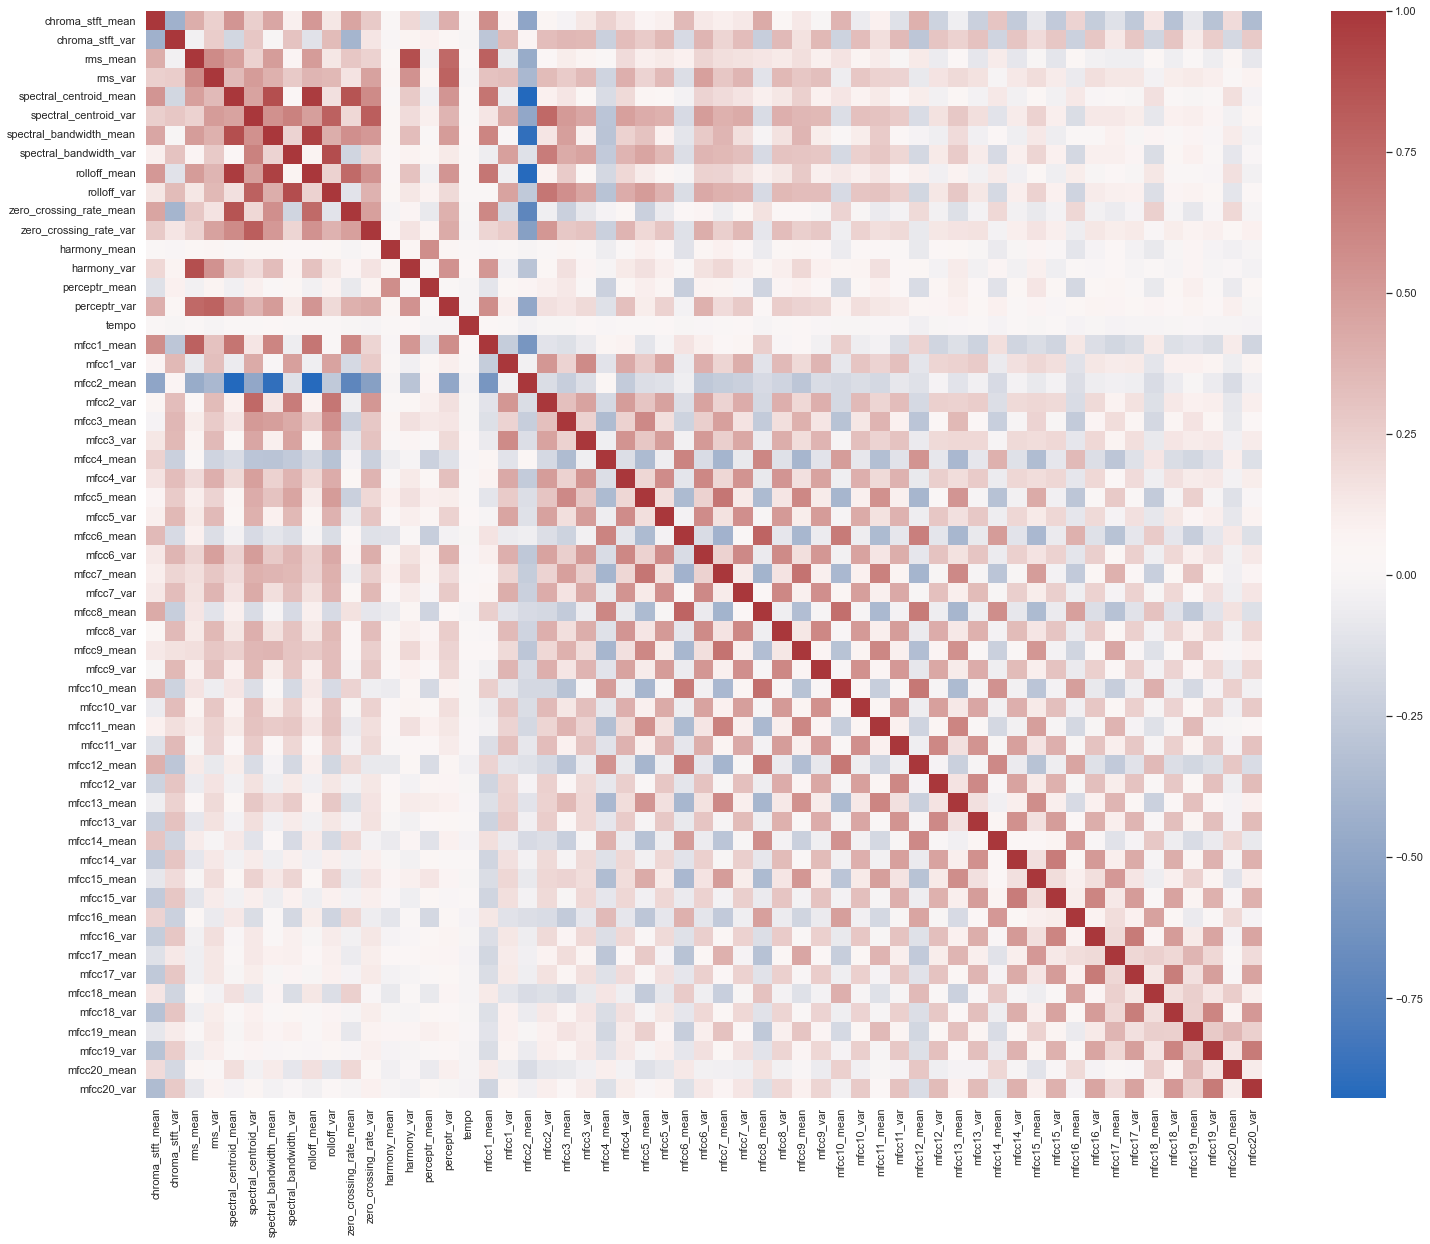

In [45]:
# Correlation are only for numeric values thus filename and target label column is not valid here. 
# label is a qualitative class and thus it do not make sence to change it to numeric value
# because the genre classes do not follow even an ordinal scale or any hierarchy.
# to note too - correlation does not tell causality

# Thus this cell is just 'exploration' cell for experimenting with correlation matrix.
# Features coorrelation matrix as heat map, just for curiosity
# Here the independent variables are included.

# One needs to understand audio features meaning and what they reprecent
# in aim to think what the different correlations might indicate.

correlation_matrix = X_training_expl.corr()
sns.set_theme()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=False, ax=ax, cmap='vlag')
plt.show()

In [46]:
# Delete unnessary exploration dataframes
del X_training_expl
del y_training_expl
del Xy_training_expl

Thoughts from GTZAN feature correlation heatmap abowe.  

Tempo seems to be uncorrelated with all other features. In the earlier feature plots against labels it was visible that tempo was not alone separating any of the genres. On the other hand it might be bringing value together with the other features.


## 3.5 Outcome


One knows now what the data consists of and how it looks statistically. One got familiar with the features and how the distributions of those might correlate with the target class. One got information on what kind of data preparations are beneficial or required to do before data is ready for input to machine learning. The test set has been separated and put aside. Similarly, the remaining data has been split for training and validation parts.

<a href = '#Introduction'>Back to Introduction</a>


## 4. Preparing Data for Machine Learning Algorithms

#### Transformation pipelines

- Cleaning data if found being in need for that. This time our set seemed fine, with no missing values. And no samples to exclude from the data. Only possibly to exlude some features if the importance indications are very small compared to others. But that can be checked only after building the random forest model and checking the feature importance values it provides.

- Scaling will be used for all eventhough feature scaling is not necessary for random forests since that algorithm don't care for the differencies in scales of variables.

- As found out earlier, dealing with right skewed variables could be considered. Thus taking a logarithm might help normalising the distributions of such variables.


#### Making working copy of data


In [47]:
# Protecting the original sets and working on copies.
X_train_tmp = X_train.copy()
X_training_tmp = X_training.copy()
X_val_tmp = X_val.copy()
X_test_tmp = X_test.copy()

<a href = '#Introduction'>Back to Introduction</a>


## 4.1 Transforming Right Skewed Variables with ln(x)


With 30 sec features experiment exp01 the skewed feature distributions were looked by eyes from histograms.
This time the skwness is checked by function that calculates the skewness factor. For this study the features having bigger than +-1.0 skewness are of interest for considering to be transformed in aim to decrease skewness of distribution.  

For being able to take logarithm, the values need to be abowe zero. So, some features need a 'move' of values. That is done by adding the min value. First trying to do that with min values got from training set in aim not to leak info of data. But if it happens that fixing end up in math error then let a bit info leak and consider the gtzan_features_3_sec_df mins as substitute min values of what a subject matter expert in task field might have proposed as knowledge got by experience.  

The situation is the same if trying to fix skewness with squareroot.

In [48]:
# check the skewness of data feature distributions, not interested in light skewness

expl_df = X_training_tmp.iloc[:,0:57]
left_skewed_columns = []
right_skewed_columns = []

for column in expl_df.columns:
    a = expl_df[column].skew()
    if a < -1.0:
        print(f'left skewed column {column} skewness {a}')
        left_skewed_columns.append(expl_df.columns.get_loc(column))
    elif a > 1.0:
        print(f'right skewed column {column} skewness {a}')
        right_skewed_columns.append(expl_df.columns.get_loc(column))        

print()
print('right_skewed_columns', right_skewed_columns) 
print('left_skewed_columns', left_skewed_columns)

right skewed column rms_var skewness 2.88636782537551
right skewed column spectral_centroid_var skewness 2.126034341387697
right skewed column spectral_bandwidth_var skewness 2.4971631440574935
right skewed column rolloff_var skewness 1.724486827255499
right skewed column zero_crossing_rate_var skewness 3.4742543614592796
left skewed column harmony_mean skewness -5.462565659224386
right skewed column harmony_var skewness 1.8859477863099914
left skewed column perceptr_mean skewness -1.5839228604578597
right skewed column perceptr_var skewness 2.10159848209092
left skewed column mfcc1_mean skewness -1.1606417232925996
right skewed column mfcc1_var skewness 3.901189925382494
right skewed column mfcc2_var skewness 2.1546496433929114
right skewed column mfcc3_var skewness 2.507282708644131
right skewed column mfcc4_var skewness 2.2901246928829364
right skewed column mfcc5_var skewness 2.559294056655793
right skewed column mfcc6_var skewness 1.9153519960630485
right skewed column mfcc7_var s

In [49]:
def fix_right_skewed_data(data, right_skewed_columns, mins):
    """This function fixes right skewness of data distribution by taking logarithm"""
    
    for item in right_skewed_columns:        
        if mins[item] < 0:            
            for row in range(data.shape[0]):
                tmp = math.log(abs(mins[item] + data.iloc[row,item]))
                data.iloc[row,item] = tmp
        else:            
            for row in range(data.shape[0]):
                tmp = math.log(data.iloc[row,item])
                data.iloc[row,item] = tmp    
    return data

# fix right skewed feature columns
mins = X_training.min()
X_train_tmp = fix_right_skewed_data(X_train_tmp, right_skewed_columns, mins)
X_training_tmp = fix_right_skewed_data(X_training_tmp, right_skewed_columns, mins)
X_val_tmp = fix_right_skewed_data(X_val_tmp, right_skewed_columns, mins)
X_test_tmp = fix_right_skewed_data(X_test_tmp, right_skewed_columns, mins)

# if it happens that fixing end up in math error then maybe one let a bit info leak,
# and consider the gtzan_features_3_sec_df mins as substitute min values of what a subject matter expert
# in task field might have proposed as knowledge got by experience.

Let the left skewed be as they are since experimenting with ln(k-x) did not provide successful unskewed result.


#### Was the log manipulation successful? Are the distributions now more 'bell' like?


Before



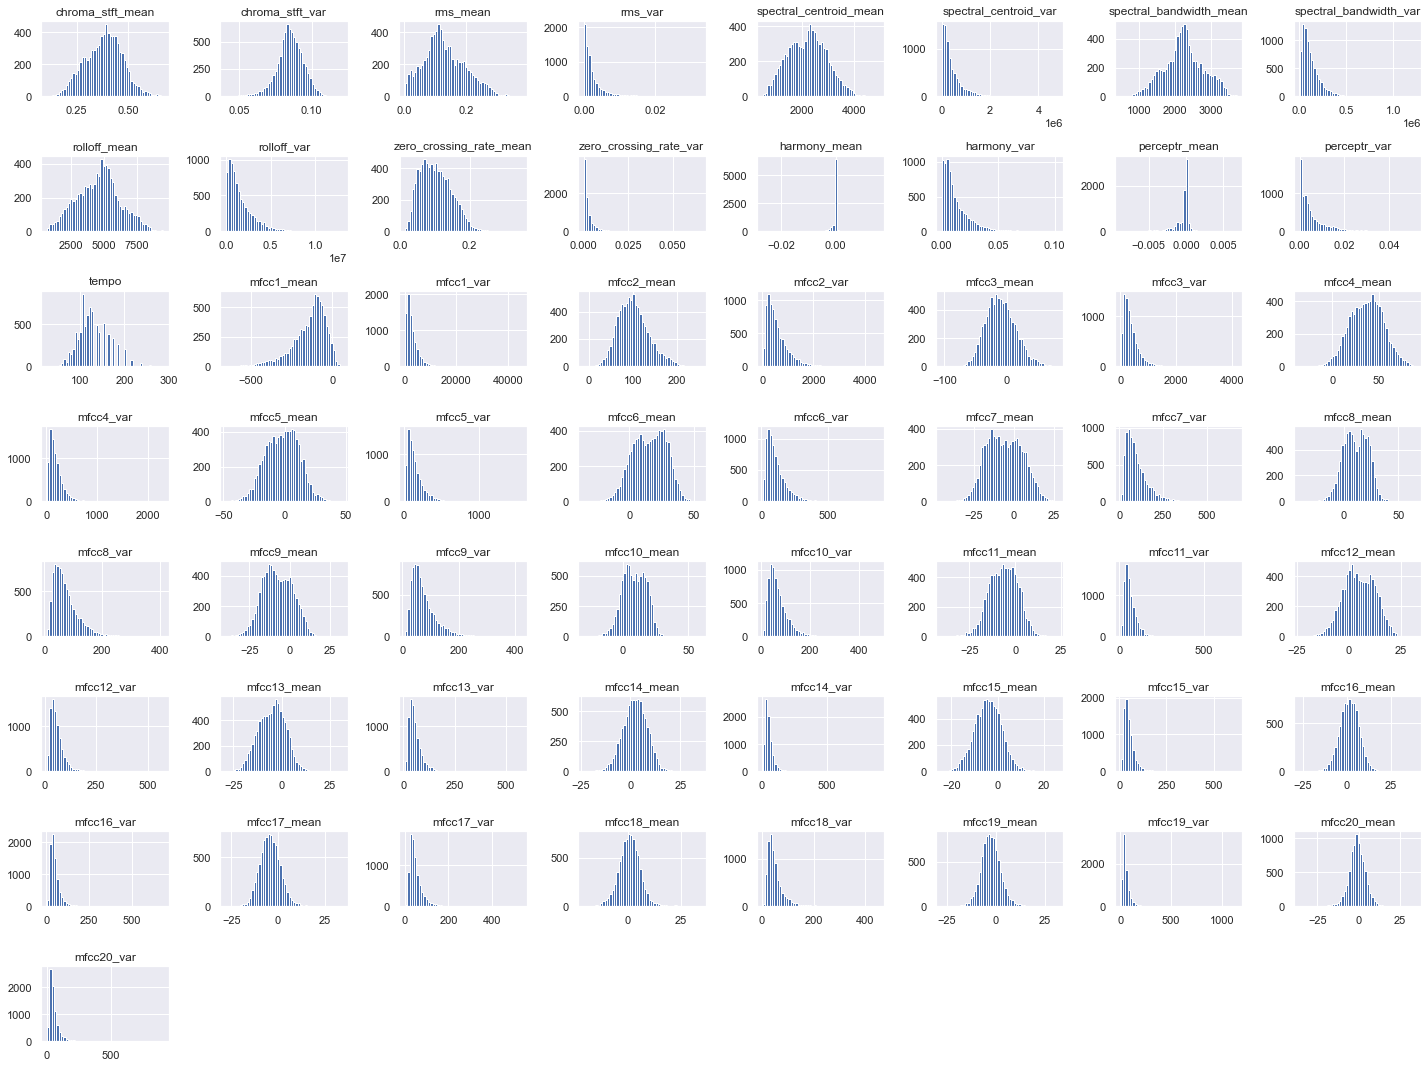

After



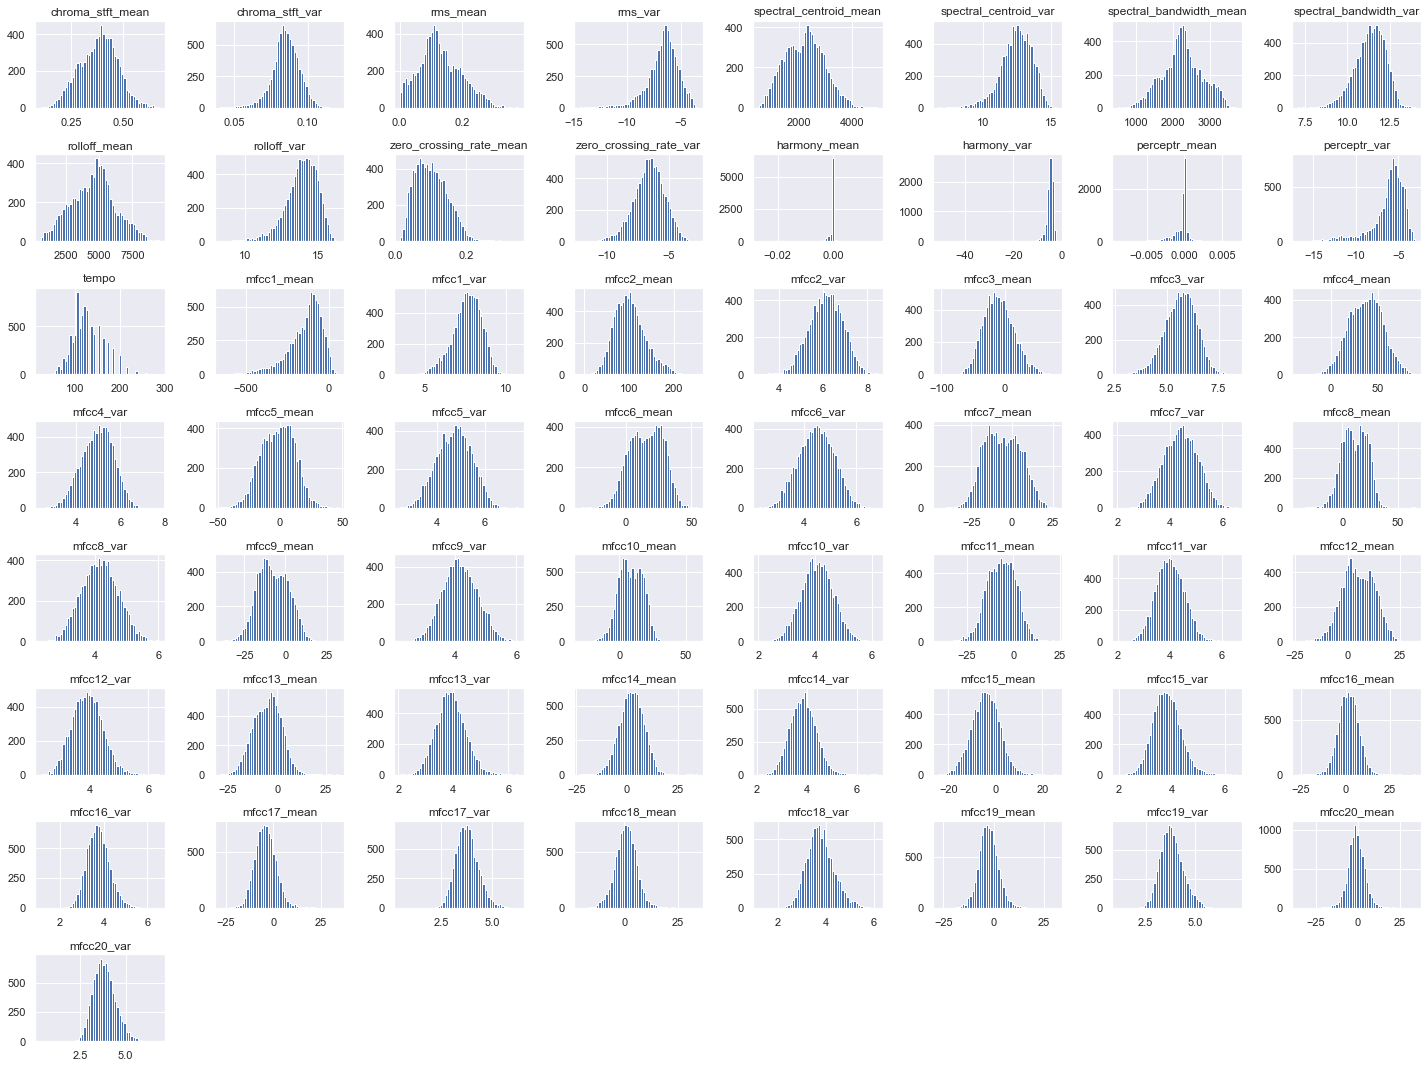

In [50]:
print('Before\n')
X_train.iloc[:,:].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

print('After\n')
X_train_tmp.iloc[:,:].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


#### Outcome: These 3 second features look better now, eventhough some column transfer results were not a great success but easily turn to skew in opposite way.


<a href = '#Introduction'>Back to Introduction</a>


## 4.2 Scaling


In [51]:
# copy data and leave the previous phase outcome untached
X_train_to_scale = X_train_tmp.copy()
X_training_to_scale = X_training_tmp.copy()
X_val_to_scale = X_val_tmp.copy()
X_test_to_scale = X_test_tmp.copy()

In [52]:
# group column should be excluded from scaling, scaling is for actual numeric feature data
X_train_group = X_train_to_scale.pop('group')
X_training_group = X_training_to_scale.pop('group')
X_val_group = X_val_to_scale.pop('group')
X_test_group = X_test_to_scale.pop('group')

In [53]:
X_test_to_scale.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
40,0.3079,0.0890,0.0805,-7.3283,1544.0380,11.8579,1577.3025,10.5711,2923.3808,13.5712,0.0860,-7.0918,-1.5083e-05,-5.5664,-2.2775e-05,-6.5750,135.9992,-180.5881,8.0524,148.9529,6.1622,-42.0088,5.4030,27.8706,4.5734,-33.1754,4.4334,14.6069,4.0688,-28.5100,3.9430,0.0381,3.9632,-14.5078,4.0172,3.2697,4.2383,-19.3300,4.2657,2.8525,4.3570,-10.4094,4.6313,-2.2767,4.5525,-12.9246,4.1563,-6.4929,4.0602,-8.4493,4.6514,3.8104,4.0078,-8.5810,3.9353,-13.2611,4.3075
41,0.2970,0.0888,0.1127,-5.3466,2388.4129,13.6182,1967.7107,11.6968,4544.4169,14.7547,0.1480,-5.0511,-5.7788e-05,-4.6396,3.4162e-05,-5.4166,135.9992,-144.9080,8.7453,97.6185,7.4937,-29.3299,5.8649,28.0086,5.8975,-38.8907,5.9322,18.4866,5.2932,-23.7916,5.1584,7.5738,4.7893,-18.5472,5.4176,6.8435,4.8823,-17.4879,4.1873,-5.9109,4.2236,-3.4709,4.7193,-7.7255,4.3564,-8.9542,4.5775,1.2475,4.8650,-10.1554,4.2241,0.0805,4.4005,-2.0460,4.2050,-13.7606,4.0259
42,0.3443,0.0898,0.0975,-5.6104,2097.3275,12.9279,1965.9011,11.4075,4234.0075,14.4603,0.1077,-6.1312,-1.3696e-05,-4.8264,2.6029e-06,-6.0060,129.1992,-155.9799,8.7672,114.6176,6.8071,-31.8462,5.7699,26.1541,5.0644,-41.7495,5.9873,15.9984,4.9277,-25.1448,4.7216,11.5403,4.6501,-19.0969,5.1851,6.4571,4.2597,-18.4737,3.8956,-1.6934,3.8821,-6.1937,4.3836,-7.5960,3.9055,-11.9567,4.4788,2.0021,4.7779,-8.6806,3.7928,-3.0362,3.6299,-2.5878,3.6692,-9.3335,3.4384
43,0.2740,0.0887,0.1025,-6.4381,1990.2426,12.5018,1767.3664,11.3839,3912.9971,14.0839,0.1161,-6.3860,-3.2058e-05,-5.1420,-5.2548e-05,-5.6935,135.9992,-142.1775,8.1958,124.7488,6.7087,-46.5320,5.3579,27.6381,5.5454,-43.4127,5.5564,14.6298,4.9476,-25.4984,4.3195,5.2873,4.9502,-13.4315,5.1334,9.0199,4.7290,-16.1717,4.8185,-2.9185,4.6004,-10.7509,4.6889,-5.5961,4.5465,-10.4202,4.3154,-0.5645,4.4178,-7.1337,4.4174,0.9221,4.2544,-6.4847,4.5499,-13.2746,4.0906
44,0.2759,0.0857,0.1073,-6.0812,1774.9745,11.8167,1627.7612,10.5703,3368.9524,13.5568,0.1081,-6.9838,-8.1193e-06,-5.1571,-1.3238e-05,-5.5821,135.9992,-155.2622,8.4828,133.5629,6.1249,-51.9022,5.6371,26.5189,4.7076,-31.0655,5.2261,15.4968,4.6430,-28.0982,4.2778,-0.6897,4.1136,-11.7058,4.1044,1.3370,3.7988,-14.5734,4.3929,5.6638,4.8298,-7.8067,4.8299,-2.5132,4.7183,-14.9755,4.8845,-6.8904,3.9032,-4.9203,4.5255,4.2464,4.0469,-8.4592,4.4966,-14.3674,4.3272


In [54]:
# create scaler
scaler = StandardScaler()

# scaler needs to be fitted to training set and not to test set samples in aim not to leak information
scaler.fit(X_training_to_scale)

StandardScaler()

In [55]:
# scale training, validation, and test sets with scaler
X_train_scaled = scaler.transform(X_train_to_scale)
X_training_scaled = scaler.transform(X_training_to_scale)
X_val_scaled = scaler.transform(X_val_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

In [56]:
print(f'X_train_scaled {type(X_train_scaled)} shape {X_train_scaled.shape}')
print(f'y_train {type(y_train)} shape {y_train.shape}')
print(f'X_train_group {type(X_train_group)} shape {X_train_group.shape}')
print()
print(f'X_training_scaled {type(X_training_scaled)} shape {X_training_scaled.shape}')
print(f'y_training {type(y_training)} shape {y_training.shape}')
print(f'X_training_group {type(X_training_group)} shape {X_training_group.shape}')
print()
print(f'X_val_scaled {type(X_val_scaled)} shape {X_val_scaled.shape}')
print(f'y_val {type(y_val)} shape {y_val.shape}')
print(f'X_val_group {type(X_val_group)} shape {X_val_group.shape}')
print()
print(f'X_test_scaled {type(X_test_scaled)} shape {X_test_scaled.shape}')
print(f'y_test {type(y_test)} shape {y_test.shape}')
print(f'X_test_group {type(X_test_group)} shape {X_test_group.shape}')

X_train_scaled <class 'numpy.ndarray'> shape (7991, 57)
y_train <class 'pandas.core.series.Series'> shape (7991,)
X_train_group <class 'pandas.core.series.Series'> shape (7991,)

X_training_scaled <class 'numpy.ndarray'> shape (6003, 57)
y_training <class 'pandas.core.series.Series'> shape (6003,)
X_training_group <class 'pandas.core.series.Series'> shape (6003,)

X_val_scaled <class 'numpy.ndarray'> shape (1988, 57)
y_val <class 'pandas.core.series.Series'> shape (1988,)
X_val_group <class 'pandas.core.series.Series'> shape (1988,)

X_test_scaled <class 'numpy.ndarray'> shape (1999, 57)
y_test <class 'pandas.core.series.Series'> shape (1999,)
X_test_group <class 'pandas.core.series.Series'> shape (1999,)


<a href = '#Introduction'>Back to Introduction</a>


## 4.3 Save Prepared Training, Validation and Test Sets to Folder for Processed Data


In [57]:
# save prepared datasets for later use

path = os.path.join(PROCESSED_DATA_PATH)

# scaled data sets
filename = os.path.join(path, experiment_id + 'X_training_scaled.pkl')
pickle.dump(X_training_scaled, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_train_scaled.pkl')
pickle.dump(X_train_scaled, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_val_scaled.pkl')
pickle.dump(X_val_scaled, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_test_scaled.pkl')
pickle.dump(X_test_scaled, open(filename, 'wb'))

# target labels
filename = os.path.join(path, experiment_id + 'y_training.pkl')
pickle.dump(y_training, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'y_train.pkl')
pickle.dump(y_train, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'y_val.pkl')
pickle.dump(y_val, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'y_test.pkl')
pickle.dump(y_test, open(filename, 'wb'))

# groups used in stratified group kFold
filename = os.path.join(path, experiment_id + 'X_training_group.pkl')
pickle.dump(X_training_group, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_train_group.pkl')
pickle.dump(X_train_group, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_val_group.pkl')
pickle.dump(X_val_group, open(filename, 'wb'))

filename = os.path.join(path, experiment_id + 'X_test_group.pkl')
pickle.dump(X_test_group, open(filename, 'wb'))

<a href = '#Introduction'>Back to Introduction</a>


## 4.4 Quick Check on Random Forest Model Feature Importances


In [58]:
# create and train rf classifier
rf_clf = RandomForestClassifier(max_features="sqrt")
rf_clf.fit(X=X_train_scaled, y=y_train)

RandomForestClassifier(max_features='sqrt')

In [59]:
strf_group_kfold_iterator = StratifiedGroupKFold(n_splits=5, random_state=rng, shuffle=True)
estimator_name = 'Random Forest'

In [60]:
# cross-validate rf classifier
scores = cross_val_score(rf_clf,X_train_scaled, y_train, groups=X_train_group, cv=strf_group_kfold_iterator)
print(rf_clf)
print(f'{estimator_name}: ' + f'mean accuracy = {scores.mean():.2%}; ' + f'standard deviation = {scores.std():.2%}')

RandomForestClassifier(max_features='sqrt')
Random Forest: mean accuracy = 68.98%; standard deviation = 2.65%


In [61]:
# see which features mattered the most on this random forest classifier
features = gtzan_features_3_sec_df.iloc[:,2:59].copy()
important_features_dict = {}

for i, val in enumerate(rf_clf.feature_importances_):
    important_features_dict[i] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
print('Feature importances:\n')

for fea in range(len(important_features_list)):
    print(f'{features.columns[important_features_list[fea]]:<25}',
          rf_clf.feature_importances_[important_features_list[fea]])

Feature importances:

perceptr_var              0.05180627047364694
chroma_stft_mean          0.03864239192750483
rms_var                   0.037823129690674334
spectral_bandwidth_mean   0.03519562307599987
rms_mean                  0.03397949647889336
mfcc4_mean                0.03268571611840211
harmony_var               0.028027412386902092
perceptr_mean             0.027776584635691652
mfcc1_mean                0.02686859653070299
rolloff_mean              0.02457553849601017
rolloff_var               0.02347308135809822
mfcc9_mean                0.023162361429612293
mfcc1_var                 0.022468006289826554
spectral_centroid_var     0.022329997992676112
mfcc6_mean                0.021919399613701995
spectral_centroid_mean    0.021085690013692968
zero_crossing_rate_mean   0.020955582871520308
harmony_mean              0.020621339142863807
mfcc5_var                 0.019970972442499083
mfcc8_mean                0.01989071668145716
mfcc3_mean                0.0190826109210744
ch

In [62]:
# Saving model to file.
model = rf_clf
name = experiment_id + 'baseline_rf_clf_for_feature_importance_investigation.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))

<a href = '#Introduction'>Back to Introduction</a>


## 4.5 Outcome

Classification turns out to depend on effects of accumulated feature combinations. Quite small importances per feature. That echoes the thing visible in feature distributions related to genre classes being a lot overlaying eachother.  

No feature is a real selector. Chroma_stft_mean and perceptr_var, and rms_var had the biggest effect around 3-5 %. Some have really small importance value even less than percent. More than half of these features, thus majority, have importance value between 1 % and 2 %.  

Smallest contributions was related to mfcc14, mfcc15, mfcc16, and mfcc17.    

- As seen also from here timbre and energy related features matter for genre classification.

<a href = '#Introduction'>Back to Introduction</a>


## 5. Modeling


Starting from clean desk. First a model baseline is to be prepared. Having the human classification accuracy as a second bencmark, and state of art model's accuracy as third benchmark - modeling work can start. From baseline models towards fine tuned hyperparameter optimised aiming for well performing classifier models.

<a href = '#Introduction'>Back to Introduction</a>


## 5.1 Creating Model Baseline Using Several Algorithms with Default Hyperparameters


Model baseline is created by training selected models with algorithms default hyperparameter values. Models are to be build using the 'smaller' training set utilising cross-validation. Then baseline models are saved to projects models directory.


#### Cross validation

- cross-validation and testing is suitable when focusing on generalization performance
- it gives more reliable estimation of model performance than pure training on train set and testing on test set
- cross validation splits the training set into desided amount of folds. One of the folds is always the test fold and other folds are used for training. After one training and testing circle the folds are circled. This train and test is repeated k times (k is the amount of folds). Finally the results of all folds are given. Both mean accuracy over all training times and std of accuracy is given.

In [63]:
# load prepared (ready for input to model) datasets (those are numpy ndarray objects)

path = os.path.join(PROCESSED_DATA_PATH)

# feature data
filename = os.path.join(path, experiment_id + 'X_training_scaled.pkl')
X_training_scaled = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_train_scaled.pkl')
X_train_scaled = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_val_scaled.pkl')
X_val_scaled = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_test_scaled.pkl')
X_test_scaled = pickle.load(open(filename, 'rb'))

# labels (genre classes)
filename = os.path.join(path, experiment_id + 'y_training.pkl')
y_training = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'y_train.pkl')
y_train = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'y_val.pkl')
y_val = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'y_test.pkl')
y_test = pickle.load(open(filename, 'rb'))

# groups used in stratified group kFold
filename = os.path.join(path, experiment_id + 'X_training_group.pkl')
X_training_group= pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_train_group.pkl')
X_train_group = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_val_group.pkl')
X_val_group = pickle.load(open(filename, 'rb'))

filename = os.path.join(path, experiment_id + 'X_test_group.pkl')
X_test_group = pickle.load(open(filename, 'rb'))

In [64]:
# create estimator (model) objects
knn_clf = KNeighborsClassifier(n_neighbors=5)
log_clf = LogisticRegression(solver="lbfgs", max_iter=500)
rf_clf = RandomForestClassifier(max_features="sqrt")
svm_clf = SVC()

print('Knn_clf parameters:',knn_clf.get_params())
print()
print('Log_clf parameters:',log_clf.get_params())
print()
print('Rf_clf parameters:',rf_clf.get_params())
print()
print('SVM_clf parameters:',svm_clf.get_params())

Knn_clf parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Log_clf parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Rf_clf parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

SVM_clf parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_fu

In [65]:
# create dictionary of estimators
estimators = {
    'KNearestNeigbor': knn_clf,
    'LogisticRecressor': log_clf,
    'RandomForest': rf_clf,
    'SupportVectorMachine': svm_clf
}

In [66]:
# train estimators using crossvalidation

start = time.time()

for estimator_name, estimator_object in estimators.items():
    strf_group_kfold = StratifiedGroupKFold(n_splits=10, random_state=rng, shuffle=True)# creating cross validation iterator
    scores = cross_val_score(estimator_object,X_training_scaled,y_training,
                             groups=X_training_group, cv=strf_group_kfold)
    print(f'{estimator_name:<20}: '
          + f'mean accuracy = {scores.mean():.2%}; '
          + f'standard deviation = {scores.std():.2%}')
    name = experiment_id + 'baseline_model_' + estimator_name +'.pkl'
    filename = os.path.join(MODELS_PATH,name)
    pickle.dump(estimator_object, open(filename, 'wb'))
    print(f'Baseline model {estimator_name} saved to file {name} in model folder.')
    print()
    
end = time.time()
print(f'Time for creating baseline models: {end - start} seconds')

KNearestNeigbor     : mean accuracy = 63.69%; standard deviation = 2.18%
Baseline model KNearestNeigbor saved to file exp02_baseline_model_KNearestNeigbor.pkl in model folder.

LogisticRecressor   : mean accuracy = 65.28%; standard deviation = 2.99%
Baseline model LogisticRecressor saved to file exp02_baseline_model_LogisticRecressor.pkl in model folder.

RandomForest        : mean accuracy = 67.45%; standard deviation = 2.27%
Baseline model RandomForest saved to file exp02_baseline_model_RandomForest.pkl in model folder.

SupportVectorMachine: mean accuracy = 70.35%; standard deviation = 2.58%
Baseline model SupportVectorMachine saved to file exp02_baseline_model_SupportVectorMachine.pkl in model folder.

Time for creating baseline models: 66.31938934326172 seconds


<a href = '#Introduction'>Back to Introduction</a>


## 5.1.2 Random Forest Classifier Performance and Error Checking


In [67]:
# train the model with training set
rf_clf.fit(X_training_scaled, y_training)

RandomForestClassifier(max_features='sqrt')

In [68]:
# predicting
predicted = rf_clf.predict(X=X_val_scaled)
expected = y_val

In [69]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [70]:
# classification accuracy
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

69.67%


In [71]:
# and the same classification accuracy using scores
print(f'{rf_clf.score(X_val_scaled, y_val):.2%}')

69.67%


In [72]:
# printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print(classification_report(expected, predicted, target_names=classes, digits=4))

              precision    recall  f1-score   support

       blues     0.6827    0.7100    0.6961       200
     classic     0.9534    0.9684    0.9608       190
     country     0.5458    0.7150    0.6190       200
       disco     0.5981    0.6124    0.6052       209
      hiphop     0.7197    0.5650    0.6331       200
        jazz     0.7512    0.8579    0.8010       190
      metall     0.7969    0.7650    0.7806       200
         pop     0.7989    0.7947    0.7968       190
      reggae     0.6705    0.5900    0.6277       200
        rock     0.5000    0.4306    0.4627       209

    accuracy                         0.6967      1988
   macro avg     0.7017    0.7009    0.6983      1988
weighted avg     0.6983    0.6967    0.6945      1988



In [73]:
# calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


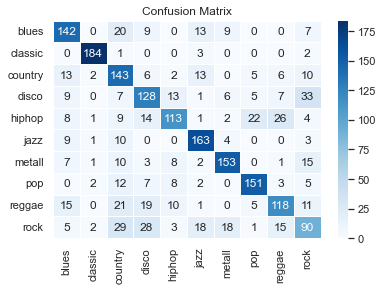

In [74]:
# printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues', fmt='.3g')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# see which features mattered the most in this random forest classifier

important_features_dict = {}
for i, val in enumerate(rf_clf.feature_importances_):
    important_features_dict[i] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
print('Feature importances:\n')

for fea in range(len(important_features_list)):
    print(f'{features.columns[important_features_list[fea]]:<25}',
          rf_clf.feature_importances_[important_features_list[fea]])
    

Feature importances:

perceptr_var              0.0542214945971266
rms_var                   0.037370153552062246
mfcc4_mean                0.03489565798895839
chroma_stft_mean          0.03349231740833971
rms_mean                  0.03261771350206991
spectral_bandwidth_mean   0.03125429520623908
harmony_var               0.028304402046654388
spectral_centroid_mean    0.026552902875382936
rolloff_mean              0.026315983479747534
mfcc1_mean                0.025907719610726535
perceptr_mean             0.025900555454374467
mfcc1_var                 0.025169407244798034
harmony_mean              0.021333321195425036
mfcc2_mean                0.0212450234577085
zero_crossing_rate_mean   0.02112464381766114
spectral_centroid_var     0.02103380255638324
mfcc8_mean                0.02102338404015111
mfcc6_mean                0.02092461540170413
rolloff_var               0.020669629048015038
mfcc9_mean                0.02026698737609384
mfcc3_mean                0.019925276612026165
mfcc

<a href = '#Introduction'>Back to Introduction</a>


## 5.2 Tuning and Testing Models

- Grid search 
- Analyze the best models and their errors
- Evaluating model on test set


### 5.2.1 Random Forest Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [76]:
rf_clf = RandomForestClassifier(max_features="sqrt")

In [77]:
param_grid = { 
    'n_estimators': [20,30,50,75,100,150,200,400],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [20,30,50,100],
    'criterion' :['gini', 'entropy']
}

In [78]:
start = time.time()

In [79]:
 strf_group_kfold = StratifiedGroupKFold(n_splits=10, random_state=rng, shuffle=True)# creating cross validation iterator

In [80]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= strf_group_kfold,
                                  return_train_score=True, verbose=2, scoring='accuracy')
HPO_grid_search_rf.fit(X_training_scaled, y_training, groups=X_training_group)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=auto, n_estimators=20; total time=   

[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=20; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_

[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=30; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=auto, n_

[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=75; total time=   1.6s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_

[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50; total time=   1.1s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.8s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.8s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.7s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.7s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.7s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.8s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.7s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_estimators=75; total time=   1.7s
[CV] END criterion=gini, max_depth=50, max_features=auto, n_

[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=75; total time=   1.6s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=75; total time=   1.6s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=75; total time=   1.6s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=75; total time=   1.6s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=75; total time=   1.6s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100; total time=   2.1s
[CV] END criterion=gini, max_depth=50, max_features=sqrt, n_estimators=100; total time=   2.2s
[CV] END criterion=gini, max_depth=50, max_features=sqr

[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.2s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.2s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.2s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.2s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.2s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100; total time=   2.2s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=150; total time=   3.4s
[CV] END criterion=gini, max_depth=100, max_features=auto, n_estimators=150; total time=   3.3s
[CV] END criterion=gini, max_depth=100, 

[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=100; total time=   3.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=100; total time=   3.6s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   5.0s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   7.9s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   5.7s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   4.9s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   5.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   4.7s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   4.7s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, n_estimators=150; total time=   4.9s
[CV] END criterion=gini, max_depth=100, 

[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=150; total time=  12.8s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=150; total time=  13.1s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=150; total time=  12.5s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=150; total time=  11.9s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=150; total time=  12.4s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=150; total time=  12.5s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=150; total time=  12.5s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200; total time=  16.7s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200; total time=  16.6s
[CV] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200; total time=  16.9s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=150; total time=  12.8s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=150; total time=  12.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  16.1s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  15.6s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  15.7s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  15.8s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  16.6s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  15.7s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  16.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=200; total time=  16.0s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=200; total time=  17.4s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=200; total time=  16.4s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=200; total time=  16.2s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=200; total time=  16.3s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=200; total time=  17.6s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=200; total time=  16.1s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=200; total time=  15.7s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=400; total time=  34.7s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=400; total time=  32.8s
[CV] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=400; total time=  34.4s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=200; total time=  14.5s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=200; total time=  14.1s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  28.5s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  29.4s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  27.6s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  29.6s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  28.8s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  29.5s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  30.1s
[CV] END criterion=entropy, max_depth=30, max_features=sqrt, n_estimators=400; total time=  32.1s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=400; total time=  30.9s
[CV] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=400; total time=  31.4s
[CV] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=400; total time=  31.5s
[CV] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=400; total time=  31.0s
[CV] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=400; total time=  32.4s
[CV] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=400; total time=  31.1s
[CV] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=400; total time=  29.5s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, n_estimators=20; total time=   1.3s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, n_estimators=20; total time=   1.4s
[CV] END criterion=entr

[CV] END criterion=entropy, max_depth=50, max_features=sqrt, n_estimators=400; total time=  33.6s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, n_estimators=400; total time=  32.3s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.8s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.6s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.8s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.6s
[CV] END criterion=entropy, max_depth=100, max_features=auto, n_estimators=20; total time=   1.5s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.6s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.7s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.9s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.7s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.6s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.6s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=20; total time=   1.5s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=30; total time=   2.2s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=30; total time=   2.3s
[CV] END criterion=e

GridSearchCV(cv=StratifiedGroupKFold(n_splits=10, random_state=54, shuffle=True),
             estimator=RandomForestClassifier(max_features='sqrt'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [20, 30, 50, 75, 100, 150, 200, 400]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [81]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} sec')

Time for optimising hyperparameters: 8768.23107457161 sec


#### HPO results

In [82]:
HPO_grid_search_rf_results = HPO_grid_search_rf.cv_results_
print(HPO_grid_search_rf_results)

{'mean_fit_time': array([ 0.69201398,  1.08455434,  1.81316822,  2.64979739,  2.69441965,
        3.27003329,  4.42227106,  8.86115627,  0.45476127,  0.66375575,
        1.11793873,  1.67802269,  2.21098886,  3.35459392,  4.47685361,
        8.92210171,  0.46190765,  0.67812524,  1.11401241,  1.661797  ,
        2.23925796,  3.37444224,  4.45032554,  8.95526178,  0.44972465,
        0.67914572,  1.12074981,  1.66326404,  2.24105318,  3.31262727,
        4.46039331,  9.19258904,  0.49992883,  0.70886691,  1.18520646,
        1.80955951,  2.25894508,  3.34496169,  4.44108291,  8.96940067,
        0.46166413,  0.66843901,  1.11842942,  1.67931089,  2.23377404,
        3.37745423,  4.49826012,  9.09193692,  0.49866326,  0.68746488,
        1.1876214 ,  1.79596164,  2.31246305,  3.39645958,  4.63843288,
       10.76526897,  0.63522713,  0.95245528,  1.64520838,  2.37158961,
        3.33854828,  5.33639169,  6.52378833, 14.96300442,  1.5893656 ,
        2.47447457,  4.25623355,  6.41276441, 

In [83]:
print('Best estimator is:', HPO_grid_search_rf.best_estimator_)

Best estimator is: RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=400)


In [84]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_search_rf.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 400}


In [85]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_search_rf.best_score_)

Mean cross-validated score of the best estimator:  0.692512657429467


In [86]:
means = HPO_grid_search_rf.cv_results_['mean_test_score']
stds = HPO_grid_search_rf.cv_results_['std_test_score']

print("Grid scores on (X_training_scaled, y_training) sets:")
print()

for mean, std, params in zip(means, stds, HPO_grid_search_rf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, 2 * std, params))
    print()


Grid scores on (X_training_scaled, y_training) sets:

0.654 (+/-0.050) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 20}

0.656 (+/-0.042) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 30}

0.667 (+/-0.057) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 50}

0.674 (+/-0.049) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 75}

0.674 (+/-0.047) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}

0.684 (+/-0.051) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 150}

0.684 (+/-0.041) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}

0.690 (+/-0.058) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 400}

0.632 (+/-0.051) for {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 20

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [87]:
predicted = HPO_grid_search_rf.best_estimator_.predict(X_val_scaled)
expected = y_val

In [88]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen validation set.')
print(f'{experiment_id} Classification report of final Random Forest classifier:')
print()
print(classification_report(expected, predicted, target_names=classes, digits=4))

Classifier tested against unseen validation set.
exp02_ Classification report of final Random Forest classifier:

              precision    recall  f1-score   support

       blues     0.7449    0.7300    0.7374       200
     classic     0.9476    0.9526    0.9501       190
     country     0.5646    0.7650    0.6497       200
       disco     0.6184    0.6124    0.6154       209
      hiphop     0.7202    0.6050    0.6576       200
        jazz     0.7488    0.8474    0.7951       190
      metall     0.7853    0.7500    0.7673       200
         pop     0.7817    0.8105    0.7959       190
      reggae     0.6927    0.6200    0.6544       200
        rock     0.4971    0.4115    0.4503       209

    accuracy                         0.7062      1988
   macro avg     0.7101    0.7104    0.7073      1988
weighted avg     0.7070    0.7062    0.7036      1988



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train the best model on the larger main train set (X_train_scaled, y_train)

In [89]:
# train the best model with train set
final_rf_clf = HPO_grid_search_rf.best_estimator_
start = time.time()
final_rf_clf.fit(X_train_scaled, y_train)
end = time.time()
tr_time_rf = end - start
print(f'Time elapsed on training: {tr_time_rf} s')

Time elapsed on training: 21.10624122619629 s


#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [90]:
# Predicting
start = time.time()
predicted = final_rf_clf.predict(X=X_test_scaled)
end = time.time()
pred_time_rf = end -start
expected = y_test
print(f'Time elapsed on predicting the test set: {pred_time_rf} sec')

Time elapsed on predicting the test set: 0.2475903034210205 sec


In [91]:
# Preparing classification report
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen test set.')
print(f'{experiment_id} Classification report of final Random Forest classifier on unseen test data:')
print()
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

Classifier tested against unseen test set.
exp02_ Classification report of final Random Forest classifier on unseen test data:

              precision    recall  f1-score   support

       blues     0.7443    0.8150    0.7780       200
     classic     0.8211    0.9421    0.8775       190
     country     0.7472    0.6650    0.7037       200
       disco     0.6718    0.4400    0.5317       200
      hiphop     0.5928    0.5779    0.5852       199
        jazz     0.7009    0.8200    0.7558       200
      metall     0.7816    0.7667    0.7740       210
         pop     0.6875    0.7150    0.7010       200
      reggae     0.5674    0.5050    0.5344       200
        rock     0.4893    0.5700    0.5266       200

    accuracy                         0.6808      1999
   macro avg     0.6804    0.6817    0.6768      1999
weighted avg     0.6802    0.6808    0.6763      1999



In [92]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


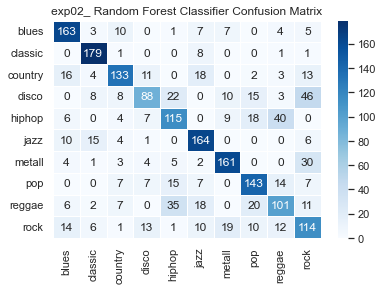

In [93]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues', fmt='.3g')
plt.title(experiment_id + ' Random Forest Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [94]:
# Saving model to file.
estimator_name = 'final_rf_clf'
model = final_rf_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_rf_clf saved to file exp02_final_rf_clf.pkl in model folder.


<a href = '#Introduction'>Back to Introduction</a>


### 5.2.2 K Nearest Neighbor Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [95]:
knn_clf = KNeighborsClassifier()

In [96]:
param_grid = { 
    'n_neighbors': [1,3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'leaf_size': ['30','20','10','5','2']
}

In [97]:
start = time.time()

In [98]:
strf_group_kfold = StratifiedGroupKFold(n_splits=10, random_state=rng, shuffle=True)# creating cross validation iterator

In [99]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_Search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid,
                                   cv= strf_group_kfold,return_train_score=True, verbose=3,
                                   scoring='accuracy')
HPO_grid_Search_knn.fit(X_training_scaled, y_training, groups=X_training_group)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.592) total time=   0.0s
[CV 2/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.575) total time=   0.0s
[CV 3/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.613) total time=   0.0s
[CV 4/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.595) total time=   0.0s
[CV 5/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.604) total time=   0.0s
[CV 6/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.578) total time=   0.0s
[CV 7/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.640) total time=   0.0s
[CV 8/10] END leaf_size=30, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.646) total time=   0.0s
[CV 9/10] END leaf_size=30, n_neighbors=1

[CV 4/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.638) total time=   0.0s
[CV 5/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.644) total time=   0.0s
[CV 6/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.602) total time=   0.0s
[CV 7/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 8/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.688) total time=   0.0s
[CV 9/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.656) total time=   0.0s
[CV 10/10] END leaf_size=30, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.662) total time=   0.0s
[CV 1/10] END leaf_size=30, n_neighbors=9, weights=uniform;, score=(train=0.929, test=0.610) total time=   0.0s
[CV 2/10] END leaf_size=30, n_neighbors=9, weights=uniform;, score=(train=0.931, test=0.625) tot

[CV 7/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=(train=0.969, test=0.622) total time=   0.0s
[CV 8/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=(train=0.969, test=0.674) total time=   0.1s
[CV 9/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=(train=0.968, test=0.641) total time=   0.0s
[CV 10/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=(train=0.968, test=0.665) total time=   0.0s
[CV 1/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.605) total time=   0.0s
[CV 2/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.588) total time=   0.0s
[CV 3/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.637) total time=   0.0s
[CV 4/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.615) total time=   0.0s
[CV 5/10] END leaf_size=20, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.624) total

[CV 10/10] END leaf_size=20, n_neighbors=9, weights=distance;, score=(train=1.000, test=0.663) total time=   0.0s
[CV 1/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.921, test=0.597) total time=   0.0s
[CV 2/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.919, test=0.642) total time=   0.0s
[CV 3/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.920, test=0.640) total time=   0.0s
[CV 4/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.918, test=0.644) total time=   0.0s
[CV 5/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.920, test=0.664) total time=   0.0s
[CV 6/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.916, test=0.615) total time=   0.0s
[CV 7/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.917, test=0.662) total time=   0.0s
[CV 8/10] END leaf_size=20, n_neighbors=11, weights=uniform;, score=(train=0.917, test=0.678) t

[CV 3/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.632) total time=   0.0s
[CV 4/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 5/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.629) total time=   0.0s
[CV 6/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.593) total time=   0.0s
[CV 7/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.637) total time=   0.0s
[CV 8/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.683) total time=   0.0s
[CV 9/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.649) total time=   0.0s
[CV 10/10] END leaf_size=10, n_neighbors=5, weights=distance;, score=(train=1.000, test=0.658) total time=   0.0s
[CV 1/10] END leaf_size=10, n_neighbors=7, weights=uniform;, score=(train=0.945, test=0.613) to

[CV 6/10] END leaf_size=5, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.578) total time=   0.0s
[CV 7/10] END leaf_size=5, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.640) total time=   0.0s
[CV 8/10] END leaf_size=5, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.646) total time=   0.0s
[CV 9/10] END leaf_size=5, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.624) total time=   0.0s
[CV 10/10] END leaf_size=5, n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.635) total time=   0.0s
[CV 1/10] END leaf_size=5, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.592) total time=   0.0s
[CV 2/10] END leaf_size=5, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.575) total time=   0.0s
[CV 3/10] END leaf_size=5, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.613) total time=   0.0s
[CV 4/10] END leaf_size=5, n_neighbors=1, weights=distance;, score=(train=1.000, test=0.595) total time=   0

[CV 10/10] END leaf_size=5, n_neighbors=7, weights=distance;, score=(train=1.000, test=0.662) total time=   0.0s
[CV 1/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.929, test=0.610) total time=   0.0s
[CV 2/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.931, test=0.625) total time=   0.0s
[CV 3/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.934, test=0.643) total time=   0.0s
[CV 4/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.930, test=0.643) total time=   0.0s
[CV 5/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.930, test=0.661) total time=   0.0s
[CV 6/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.930, test=0.617) total time=   0.0s
[CV 7/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.929, test=0.655) total time=   0.0s
[CV 8/10] END leaf_size=5, n_neighbors=9, weights=uniform;, score=(train=0.926, test=0.688) total time=   0.0s

[CV 4/10] END leaf_size=2, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.615) total time=   0.0s
[CV 5/10] END leaf_size=2, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.624) total time=   0.0s
[CV 6/10] END leaf_size=2, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.593) total time=   0.0s
[CV 7/10] END leaf_size=2, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.632) total time=   0.0s
[CV 8/10] END leaf_size=2, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.673) total time=   0.0s
[CV 9/10] END leaf_size=2, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.651) total time=   0.0s
[CV 10/10] END leaf_size=2, n_neighbors=3, weights=distance;, score=(train=1.000, test=0.643) total time=   0.0s
[CV 1/10] END leaf_size=2, n_neighbors=5, weights=uniform;, score=(train=0.957, test=0.618) total time=   0.0s
[CV 2/10] END leaf_size=2, n_neighbors=5, weights=uniform;, score=(train=0.955, test=0.632) total time= 

[CV 8/10] END leaf_size=2, n_neighbors=11, weights=uniform;, score=(train=0.917, test=0.678) total time=   0.0s
[CV 9/10] END leaf_size=2, n_neighbors=11, weights=uniform;, score=(train=0.916, test=0.668) total time=   0.0s
[CV 10/10] END leaf_size=2, n_neighbors=11, weights=uniform;, score=(train=0.920, test=0.672) total time=   0.0s
[CV 1/10] END leaf_size=2, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.620) total time=   0.0s
[CV 2/10] END leaf_size=2, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.635) total time=   0.0s
[CV 3/10] END leaf_size=2, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.645) total time=   0.0s
[CV 4/10] END leaf_size=2, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.652) total time=   0.0s
[CV 5/10] END leaf_size=2, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.656) total time=   0.0s
[CV 6/10] END leaf_size=2, n_neighbors=11, weights=distance;, score=(train=1.000, test=0.615) tota

GridSearchCV(cv=StratifiedGroupKFold(n_splits=10, random_state=54, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': ['30', '20', '10', '5', '2'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [100]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} seconds')

Time for optimising hyperparameters: 570.5373687744141 seconds


#### HPO results

In [101]:
HPO_grid_Search_knn_results = HPO_grid_Search_knn.cv_results_
print(HPO_grid_Search_knn_results)

{'mean_fit_time': array([0.00509646, 0.01055293, 0.00892224, 0.01097782, 0.00628991,
       0.00691609, 0.00732684, 0.00935879, 0.00611837, 0.00731568,
       0.00682497, 0.00984371, 0.00709968, 0.00993733, 0.00810888,
       0.00924416, 0.00689063, 0.007916  , 0.00730174, 0.00790915,
       0.00791826, 0.00772035, 0.00689104, 0.00671933, 0.00709305,
       0.00853498, 0.0079006 , 0.00791156, 0.00731037, 0.00751007,
       0.00733387, 0.00876236, 0.00751798, 0.00768297, 0.00528848,
       0.00724909, 0.00792785, 0.00792878, 0.01012902, 0.00892   ,
       0.0091152 , 0.00730994, 0.0050909 , 0.01036797, 0.00751569,
       0.00733778, 0.00813739, 0.00567644, 0.00972857, 0.00833931,
       0.00830216, 0.00782886, 0.00629861, 0.00447347, 0.00669692,
       0.00829477, 0.00811834, 0.00728779, 0.00648072, 0.00552001]), 'std_fit_time': array([0.00416475, 0.00127537, 0.00239548, 0.00243686, 0.00399643,
       0.00418273, 0.00353059, 0.00243406, 0.0046376 , 0.00434801,
       0.00417527, 0.00392

In [102]:
print('Best estimator is:', HPO_grid_Search_knn.best_estimator_)

Best estimator is: KNeighborsClassifier(leaf_size='30', n_neighbors=11, weights='distance')


In [103]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_Search_knn.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'leaf_size': '30', 'n_neighbors': 11, 'weights': 'distance'}


In [104]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_Search_knn.best_score_)

Mean cross-validated score of the best estimator:  0.6505261829797148


In [105]:
print("Grid scores on (X_training_scaled, y_training) sets:")
print()
means = HPO_grid_Search_knn.cv_results_["mean_test_score"]
stds = HPO_grid_Search_knn.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, HPO_grid_Search_knn.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, 2 * std, params))
    print()


Grid scores on (X_training_scaled, y_training) sets:

0.610 (+/-0.048) for {'leaf_size': '30', 'n_neighbors': 1, 'weights': 'uniform'}

0.610 (+/-0.048) for {'leaf_size': '30', 'n_neighbors': 1, 'weights': 'distance'}

0.626 (+/-0.051) for {'leaf_size': '30', 'n_neighbors': 3, 'weights': 'uniform'}

0.626 (+/-0.050) for {'leaf_size': '30', 'n_neighbors': 3, 'weights': 'distance'}

0.637 (+/-0.044) for {'leaf_size': '30', 'n_neighbors': 5, 'weights': 'uniform'}

0.635 (+/-0.046) for {'leaf_size': '30', 'n_neighbors': 5, 'weights': 'distance'}

0.642 (+/-0.047) for {'leaf_size': '30', 'n_neighbors': 7, 'weights': 'uniform'}

0.643 (+/-0.044) for {'leaf_size': '30', 'n_neighbors': 7, 'weights': 'distance'}

0.647 (+/-0.047) for {'leaf_size': '30', 'n_neighbors': 9, 'weights': 'uniform'}

0.649 (+/-0.044) for {'leaf_size': '30', 'n_neighbors': 9, 'weights': 'distance'}

0.648 (+/-0.049) for {'leaf_size': '30', 'n_neighbors': 11, 'weights': 'uniform'}

0.651 (+/-0.044) for {'leaf_size': '30

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [106]:
predicted = HPO_grid_Search_knn.best_estimator_.predict(X_val_scaled)
expected = y_val

In [107]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print(f'{experiment_id} KNN Klassifier Classification Report')
print(classification_report(expected, predicted, target_names=classes, digits=4))

exp02_ KNN Klassifier Classification Report
              precision    recall  f1-score   support

       blues     0.7354    0.6950    0.7147       200
     classic     0.9381    0.9579    0.9479       190
     country     0.5556    0.7000    0.6195       200
       disco     0.4694    0.6603    0.5487       209
      hiphop     0.6000    0.4800    0.5333       200
        jazz     0.8026    0.6421    0.7135       190
      metall     0.8606    0.7100    0.7781       200
         pop     0.7882    0.8421    0.8142       190
      reggae     0.6267    0.6800    0.6523       200
        rock     0.4877    0.3780    0.4259       209

    accuracy                         0.6710      1988
   macro avg     0.6864    0.6745    0.6748      1988
weighted avg     0.6822    0.6710    0.6708      1988



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train this model on the larger main train set X_train_scaled

In [108]:
# train the best model with train set
final_knn_clf = HPO_grid_Search_knn.best_estimator_
start = time.time()
final_knn_clf.fit(X_train_scaled, y_train)
end = time.time()
tr_time_knn = end - start
print(f'Time elapsed on predicting the test set: {tr_time_knn} s')


Time elapsed on predicting the test set: 0.015639543533325195 s


#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [109]:
# predicting
start = time.time()
predicted = final_knn_clf.predict(X=X_test_scaled)
end = time.time()
pred_time_knn = end - start
expected = y_test
print(f'Time elapsed on predicting the test set: {pred_time_knn} s')

Time elapsed on predicting the test set: 0.4260883331298828 s


In [110]:
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print(f'{experiment_id} KNN Klassifier Classification Report - unseen test set')
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

exp02_ KNN Klassifier Classification Report - unseen test set
              precision    recall  f1-score   support

       blues     0.7750    0.7750    0.7750       200
     classic     0.8750    0.9211    0.8974       190
     country     0.6685    0.6150    0.6406       200
       disco     0.5105    0.6050    0.5538       200
      hiphop     0.6768    0.6734    0.6751       199
        jazz     0.8010    0.8050    0.8030       200
      metall     0.8208    0.6762    0.7415       210
         pop     0.7487    0.7300    0.7392       200
      reggae     0.5266    0.5450    0.5356       200
        rock     0.5392    0.5500    0.5446       200

    accuracy                         0.6883      1999
   macro avg     0.6942    0.6896    0.6906      1999
weighted avg     0.6939    0.6883    0.6898      1999



In [111]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


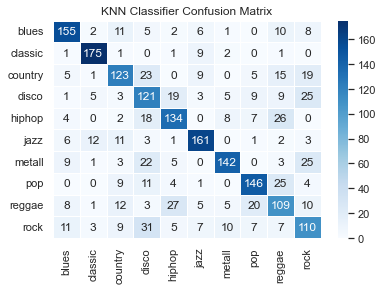

In [112]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues', fmt='.4g')
plt.title('KNN Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [113]:
# Saving model to file.
estimator_name = 'final_knn_clf'
model = final_knn_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_knn_clf saved to file exp02_final_knn_clf.pkl in model folder.


In [114]:
# checking the effect of k for knn estimator

for k in range(1,40,2):

    strf_group_kfold = StratifiedGroupKFold(n_splits=10, random_state=rng, shuffle=True) # creating cross validation iterator
    tmp_knn_clf = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='kd_tree')
    scores = cross_val_score(tmp_knn_clf,X_training_scaled,y_training, groups=X_training_group, cv=strf_group_kfold)
    print(f'k={k:<4}, mean accuracy={scores.mean():.2%}, ' + 
          f'standard deviation={scores.std():.2%}')
       

k=1   , mean accuracy=61.02%, standard deviation=2.42%
k=3   , mean accuracy=62.61%, standard deviation=2.51%
k=5   , mean accuracy=63.52%, standard deviation=2.31%
k=7   , mean accuracy=64.29%, standard deviation=2.18%
k=9   , mean accuracy=64.89%, standard deviation=2.22%
k=11  , mean accuracy=65.05%, standard deviation=2.19%
k=13  , mean accuracy=65.21%, standard deviation=2.11%
k=15  , mean accuracy=65.21%, standard deviation=1.91%
k=17  , mean accuracy=65.39%, standard deviation=2.16%
k=19  , mean accuracy=65.26%, standard deviation=2.28%
k=21  , mean accuracy=65.22%, standard deviation=2.42%
k=23  , mean accuracy=65.27%, standard deviation=2.35%
k=25  , mean accuracy=65.10%, standard deviation=2.33%
k=27  , mean accuracy=65.37%, standard deviation=2.14%
k=29  , mean accuracy=65.14%, standard deviation=2.07%
k=31  , mean accuracy=65.15%, standard deviation=1.93%
k=33  , mean accuracy=65.08%, standard deviation=2.07%
k=35  , mean accuracy=65.12%, standard deviation=2.14%
k=37  , me

<a href = '#Introduction'>Back to Introduction</a>


### 5.2.3 Logistic Regression Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [115]:
log_clf = LogisticRegression(solver="lbfgs", max_iter=500)

In [116]:
strf_group_kfold = StratifiedGroupKFold(n_splits=10, random_state=rng, shuffle=True)# creating cross validation iterator

In [117]:
param_grid = { 
    'penalty': ['l2'],
    'dual': [False],
    'C' : [0.1,0.2,0.3,0.4,0.5, 1.0, 1.5, 2.0, 4.0],
    'solver' :['newton-cg'],
    'max_iter': [100, 200, 500],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

In [118]:
start = time.time()

In [119]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_Search_log = GridSearchCV(estimator=log_clf, param_grid=param_grid, cv= strf_group_kfold)
HPO_grid_Search_log.fit(X_training_scaled, y_training, groups=X_training_group)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=10, random_state=54, shuffle=True),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 4.0],
                         'dual': [False], 'max_iter': [100, 200, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'], 'solver': ['newton-cg']})

In [120]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} seconds')

Time for optimising hyperparameters: 1132.7517039775848 seconds


#### HPO results

In [121]:
HPO_grid_Search_log_results = HPO_grid_Search_log.cv_results_
print(HPO_grid_Search_log_results)

{'mean_fit_time': array([0.8222822 , 1.21021607, 0.99094656, 0.85742612, 1.23715541,
       0.84348025, 0.8885555 , 1.26899514, 0.85653899, 0.95690298,
       1.29882629, 0.90368531, 0.94543505, 1.34570312, 0.98071051,
       1.16224556, 1.34901383, 1.14949291, 1.06120551, 1.38545837,
       0.98619368, 1.07738285, 1.1013839 , 1.09368587, 1.05312858,
       1.37394733, 1.11477091, 1.27053294, 1.39170048, 1.0051729 ,
       1.09067349, 1.4018055 , 1.183461  , 0.96209874, 1.18357337,
       1.02049212, 1.23526862, 1.32686801, 1.11287374, 1.14253213,
       1.24464955, 1.23570917, 1.18019388, 1.31191177, 1.18609104,
       1.3497678 , 1.46635504, 1.60413568, 1.54391503, 1.54036293,
       1.5866713 , 1.64752293, 1.60052552, 1.36129022, 1.16320508,
       1.41144958, 1.5246242 , 1.70824828, 1.64342823, 1.49022629,
       1.65970008, 1.65121624, 1.73347275, 1.72609537, 1.76273494,
       1.8766974 , 1.56626747, 1.31373563, 1.6765723 , 1.63816733,
       1.73952601, 1.76042216, 1.93343689, 1

In [122]:
print('Best estimator is:', HPO_grid_Search_log.best_estimator_)

Best estimator is: LogisticRegression(C=0.2, solver='newton-cg')


In [123]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_Search_log.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'C': 0.2, 'dual': False, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


In [124]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_Search_log.best_score_)

Mean cross-validated score of the best estimator:  0.6568239271531715


In [125]:
print("Grid scores on (X_training_scaled, y_training) sets:")
print()
means = HPO_grid_Search_log.cv_results_["mean_test_score"]
stds = HPO_grid_Search_log.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, HPO_grid_Search_log.cv_results_["params"]):
    print(f'mean accuracy %0.2f (+/-%0.02f) for \n %r \n' % (mean, 2 * std, params))
    print()
    

Grid scores on (X_training_scaled, y_training) sets:

mean accuracy 0.66 (+/-0.05) for 
 {'C': 0.1, 'dual': False, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.65 (+/-0.06) for 
 {'C': 0.1, 'dual': False, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.66 (+/-0.05) for 
 {'C': 0.1, 'dual': False, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.66 (+/-0.05) for 
 {'C': 0.1, 'dual': False, 'max_iter': 200, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.65 (+/-0.06) for 
 {'C': 0.1, 'dual': False, 'max_iter': 200, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.66 (+/-0.05) for 
 {'C': 0.1, 'dual': False, 'max_iter': 200, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'} 


mean accuracy 0.66 (+/-0.05) for 
 {'C': 0.1, 'dual': False, 'max_iter

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [126]:
predicted = HPO_grid_Search_log.best_estimator_.predict(X_val_scaled)
expected = y_val

In [127]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen validation set.')
print('Classificationreport of HPO Logistic Recression Classifier on unseen validation data:')
print()
print(classification_report(expected, predicted, target_names=classes, digits=4))

Classifier tested against unseen validation set.
Classificationreport of HPO Logistic Recression Classifier on unseen validation data:

              precision    recall  f1-score   support

       blues     0.6923    0.7200    0.7059       200
     classic     0.9381    0.9579    0.9479       190
     country     0.6504    0.7350    0.6901       200
       disco     0.5195    0.5742    0.5455       209
      hiphop     0.6952    0.6500    0.6718       200
        jazz     0.7665    0.7947    0.7804       190
      metall     0.7798    0.6550    0.7120       200
         pop     0.7681    0.8368    0.8010       190
      reggae     0.7063    0.5650    0.6278       200
        rock     0.4714    0.4737    0.4726       209

    accuracy                         0.6922      1988
   macro avg     0.6988    0.6962    0.6955      1988
weighted avg     0.6950    0.6922    0.6916      1988



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train this model on the larger main train set (X_train_scaled, y_train)

In [128]:
# train the best model with train set
final_log_clf = HPO_grid_Search_log.best_estimator_
start = time.time()
final_log_clf.fit(X_train_scaled, y_train)
end = time.time()
tr_time_log = end - start
print(f'Time elapsed on training: {tr_time_log} s')

Time elapsed on training: 1.5184273719787598 s


#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [129]:
# predicting
start = time.time()
predicted = final_log_clf.predict(X=X_test_scaled)
end = time.time()
pred_time_log = end - start
expected = y_test
print(f'Time elapsed on predicting the test set: {pred_time_log} s')

Time elapsed on predicting the test set: 0.007496356964111328 s


In [130]:
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen test set.')
print(f'{experiment_id} Classificationreport of final Logistic Regression Classifier on unseen test data:')
print()
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

Classifier tested against unseen test set.
exp02_ Classificationreport of final Logistic Regression Classifier on unseen test data:

              precision    recall  f1-score   support

       blues     0.6202    0.6450    0.6324       200
     classic     0.8934    0.9263    0.9096       190
     country     0.5521    0.5300    0.5408       200
       disco     0.6374    0.5450    0.5876       200
      hiphop     0.6433    0.5528    0.5946       199
        jazz     0.6978    0.7850    0.7388       200
      metall     0.7296    0.8095    0.7675       210
         pop     0.6681    0.7850    0.7218       200
      reggae     0.5202    0.4500    0.4826       200
        rock     0.3918    0.3800    0.3858       200

    accuracy                         0.6403      1999
   macro avg     0.6354    0.6409    0.6361      1999
weighted avg     0.6346    0.6403    0.6355      1999



In [131]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


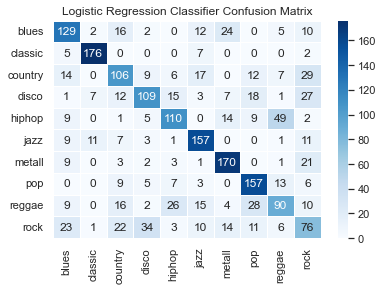

In [132]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues', fmt='.4g')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [133]:
# Saving model to file.
estimator_name = 'final_log_clf'
model = final_log_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_log_clf saved to file exp02_final_log_clf.pkl in model folder.


<a href = '#Introduction'>Back to Introduction</a>


### 5.2.4 Support Vector Machine Model


#### Optimising classifier on accuracy with gridsearch crossvalidation

In [134]:
svm_clf = SVC()

In [135]:
strf_group_kfold = StratifiedGroupKFold(n_splits=10, random_state=rng, shuffle=True)# creating cross validation iterator

In [136]:
# ovo always as multi-class strategy - oadditionally the decision funtion shape can be set by parameter - default is ovr
# probability omitted here since it would slow down calculation having internal 5 fold crodd-validation
param_grid = { 
    'C': [7.5, 8.0, 9.0, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.5, 11.0],
    'kernel': ['rbf','poly'],
    'degree' : [2, 3, 4],
    'gamma' : ['scale','auto'],
    #'shrinking': ['True'],
    #'probability': ['False'],
    'tol': [0.001, 0.0001, 0.0002],
    'cache_size': [1000],
    'max_iter': [-1],
    #'decision_function_shape': ['ovo'],
    'random_state': [4]
}

In [137]:
start = time.time()

In [138]:
# Searhing best hyperparameter set that provide best estimator (classifier) accuracy
HPO_grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv= strf_group_kfold)
HPO_grid_search_svm.fit(X_training_scaled, y_training, groups=X_training_group)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=10, random_state=54, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [7.5, 8.0, 9.0, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0,
                               10.1, 10.2, 10.5, 11.0],
                         'cache_size': [1000], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'poly'],
                         'max_iter': [-1], 'random_state': [4],
                         'tol': [0.001, 0.0001, 0.0002]})

In [139]:
end = time.time()
print(f'Time for optimising hyperparameters: {end - start} seconds')

Time for optimising hyperparameters: 7224.818380832672 seconds


#### HPO results

In [140]:
HPO_grid_search_svm_results = HPO_grid_search_svm.cv_results_
print(HPO_grid_search_svm_results)

{'mean_fit_time': array([ 1.13553302,  1.07524493,  1.19334431,  1.15640097,  1.12602456,
        1.06189635,  1.02170448,  1.1053879 ,  1.01086051,  0.99437177,
        1.09849126,  1.05795162,  1.05923998,  1.04335353,  1.01610911,
        0.93520799,  1.05719638,  1.04331894,  1.05825901,  1.10367854,
        1.128842  ,  1.01112013,  1.00487432,  0.9377064 ,  0.99697013,
        1.07624319,  1.11898003,  1.39940746,  1.44023886,  1.42628314,
        1.04821291,  1.00637164,  1.04742937,  1.37249453,  1.49034598,
        1.45913374,  1.036607  ,  1.14162986,  1.19649351,  1.13909705,
        1.16032786,  1.08874094,  1.06151235,  1.13750336,  1.10204213,
        1.02029443,  1.13772106,  1.15887117,  1.01590915,  1.14604411,
        1.12682977,  1.03735671,  1.15610671,  1.02799077,  1.05301566,
        1.0563556 ,  1.07263072,  0.91331296,  1.11129353,  1.1435286 ,
        1.22866683,  1.21822424,  1.14994578,  1.4165504 ,  1.49363241,
        1.54723547,  1.02166486,  1.116589  , 

In [141]:
print('Best estimator is:', HPO_grid_search_svm.best_estimator_)

Best estimator is: SVC(C=7.5, cache_size=1000, degree=2, random_state=4, tol=0.0001)


In [142]:
print('Best set of parameters found on gridseach using crossvalidation:')
print(HPO_grid_search_svm.best_params_)

Best set of parameters found on gridseach using crossvalidation:
{'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.0001}


In [143]:
print('Mean cross-validated score of the best estimator: ',HPO_grid_search_svm.best_score_)

Mean cross-validated score of the best estimator:  0.7188320657085335


In [144]:
print("Grid scores on (X_training_scaled, y_training) sets:")
print()
means = HPO_grid_search_svm.cv_results_["mean_test_score"]
stds = HPO_grid_search_svm.cv_results_["std_test_score"]

for mean, std, params in zip(means, stds, HPO_grid_search_svm.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, 2 * std, params))
    print()
    

Grid scores on (X_training_scaled, y_training) sets:

0.719 (+/-0.032) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.001}

0.719 (+/-0.031) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.0001}

0.719 (+/-0.031) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'random_state': 4, 'tol': 0.0002}

0.643 (+/-0.055) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'random_state': 4, 'tol': 0.001}

0.643 (+/-0.055) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'random_state': 4, 'tol': 0.0001}

0.643 (+/-0.055) for {'C': 7.5, 'cache_size': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'random_state': 4, 'tol': 0.0002}

0.718 (+/-0.031) for {'C': 7.5, 'cache_

#### Let us see how this hyperparameter optimised model performs on validation set it has not seen before

In [145]:
predicted = HPO_grid_search_svm.best_estimator_.predict(X_val_scaled)
expected = y_val

In [146]:
# Printing metrics report
classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen validation set.')
print('Classificationreport of HPO Support Vector Machine Classifier on unseen validation data:')
print()
print(classification_report(expected, predicted, target_names=classes, digits=4))

Classifier tested against unseen validation set.
Classificationreport of HPO Support Vector Machine Classifier on unseen validation data:

              precision    recall  f1-score   support

       blues     0.7464    0.7800    0.7628       200
     classic     0.9634    0.9684    0.9659       190
     country     0.6222    0.8400    0.7149       200
       disco     0.5502    0.6029    0.5753       209
      hiphop     0.7241    0.6300    0.6738       200
        jazz     0.7900    0.8316    0.8103       190
      metall     0.8693    0.6650    0.7535       200
         pop     0.8069    0.8579    0.8316       190
      reggae     0.7662    0.5900    0.6667       200
        rock     0.5000    0.4928    0.4964       209

    accuracy                         0.7218      1988
   macro avg     0.7339    0.7259    0.7251      1988
weighted avg     0.7302    0.7218    0.7212      1988



Model's ability to generalize decreases if accuracy on validation set is much less than accurcy of training set. That indicates overfitted model. -> Reguires simplification or regulation or less noisy feature data or more data.    

This model performed ok on the validation set when comparing to cross-validated accuracy calculated during hpo.

#### Then it is time to train this model on the larger main train set (X_train_scaled, y_train)

In [147]:
final_svm_clf = HPO_grid_search_svm.best_estimator_
start = time.time()
final_svm_clf.fit(X_train_scaled, y_train)
end = time.time()
tr_time_svm = end - start
print(f'Time elapsed on training: {tr_time_svm} s')

Time elapsed on training: 1.4712798595428467 s


#### And finally test how it performs on predicting the ultimate test set which was separated early and is new to the model and the exploration process.

In [148]:
# predicting
start = time.time()
predicted = final_svm_clf.predict(X=X_test_scaled)
end = time.time()
pred_time_svm = end - start
expected = y_test
print(f'Time elapsed on predicting the test set: {pred_time_svm} s')

Time elapsed on predicting the test set: 1.0425927639007568 s


In [149]:
target_classes = ['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock']
print('Classifier tested against unseen test set.')
print(f'{experiment_id} Classificationreport of final Support Vector Machine classifier on unseen test data:')
print()
print(classification_report(expected, predicted, target_names=target_classes, digits=4))

Classifier tested against unseen test set.
exp02_ Classificationreport of final Support Vector Machine classifier on unseen test data:

              precision    recall  f1-score   support

       blues     0.7500    0.8250    0.7857       200
     classic     0.8080    0.9526    0.8744       190
     country     0.6957    0.7200    0.7076       200
       disco     0.7246    0.6050    0.6594       200
      hiphop     0.6872    0.6734    0.6802       199
        jazz     0.8111    0.8800    0.8441       200
      metall     0.8516    0.7381    0.7908       210
         pop     0.7291    0.7400    0.7345       200
      reggae     0.5669    0.4450    0.4986       200
        rock     0.5463    0.6200    0.5808       200

    accuracy                         0.7189      1999
   macro avg     0.7170    0.7199    0.7156      1999
weighted avg     0.7173    0.7189    0.7152      1999



In [150]:
# Calculating confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
classes_pdser = pd.Series(['blues','classic','country','disco','hiphop','jazz','metall','pop','reggae','rock'])
confusion_df = pd.DataFrame(confusion, index=classes_pdser, columns=classes_pdser)

True classes in rows, predictions in columns


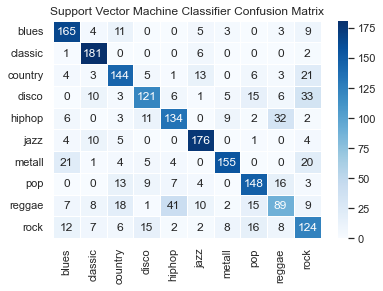

In [151]:
# Printing confusion matrix
print('True classes in rows, predictions in columns')
axes = sns.heatmap(confusion_df, annot=True, linewidths=.5, cmap='Blues', fmt='.4g')
plt.title('Support Vector Machine Classifier Confusion Matrix')
plt.show()

#### Save the final model to project model folder

In [152]:
# Saving model to file.
estimator_name = 'final_svm_clf'
model = final_svm_clf
name = experiment_id + estimator_name + '.pkl'
filename = os.path.join(MODELS_PATH,name)
pickle.dump(model, open(filename, 'wb'))
print(f'Model {estimator_name} saved to file {name} in model folder.')

Model final_svm_clf saved to file exp02_final_svm_clf.pkl in model folder.


<a href = '#Introduction'>Back to Introduction</a>


## 6. Independencies


In [153]:
%load_ext watermark
%watermark -v -n -m -p matplotlib,numpy,scipy,sklearn,pandas,seaborn

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.29.0

matplotlib: 3.5.0
numpy     : 1.20.3
scipy     : 1.7.1
sklearn   : 1.0.1
pandas    : 1.3.4
seaborn   : 0.11.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit




## 7. References

(1) Information on GTZAN dataset is available on http://martyas.info/downloads/datasets.html  

(2) Andrada Oteanu, James Wiltshire, Lauren O'Hare and Minyu Lei, GTZAN feature data csv -files available from https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification  

(3) Géron A. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. O’Reilly Media, Inc; 2019.  

(4) Brian McFee, Alexandros Metsai, Matt McVicar, Stefan Balke, Carl Thomé, Colin Raffel, et al. librosa/librosa: 0.8.1rc2. Zenodo; 2021.  

(5) Scikit-learn documentation https://scikit-learn.org/stable/index.html  

(6) Pandas documentation https://pandas.pydata.org/docs/  

(7) Seaborn documentation https://seaborn.pydata.org/  

(8) NumPy documentation https://numpy.org/doc/stable/

(9) Markdown documentation https://www.markdownguide.org/  

(10) Jupyter documentation https://jupyter.org/index.html  


In [154]:
# Total time taken to run this notebook from beginning to end
end0 = time.time()
print(f'total time elapsed on running this notebook from beginning to end is {(end0-start0) / 60} minuuttia')

total time elapsed on running this notebook from beginning to end is 301.87281034390134 minuuttia


In [155]:
print(f'{experiment_id} Training and prediction times of final classifier models:')

print(f'Randon Forest Classifier\'s Time elapsed on training: {tr_time_rf} s')
print(f'KNN Classifier\'s Time elapsed on training: {tr_time_knn} s')
print(f'Logistic Regression Classifier\'s Time elapsed on training: {tr_time_log} s')
print(f'SVM Classifier\'s Time elapsed on training: {tr_time_svm} s')
print()
print(f'Randon Forest Classifier\'s Time elapsed on predicting: {pred_time_rf} s')
print(f'KNN Classifier\'s Time elapsed on predicting: {pred_time_knn} s')
print(f'Logistic Regression Classifier\'s Time elapsed on predicting: {pred_time_log} s')
print(f'SVM Classifier\'s Time elapsed on predicting: {pred_time_svm} s')

exp02_ Training and prediction times of final classifier models:
Randon Forest Classifier's Time elapsed on training: 21.10624122619629 s
KNN Classifier's Time elapsed on training: 0.015639543533325195 s
Logistic Regression Classifier's Time elapsed on training: 1.5184273719787598 s
SVM Classifier's Time elapsed on training: 1.4712798595428467 s

Randon Forest Classifier's Time elapsed on predicting: 0.2475903034210205 s
KNN Classifier's Time elapsed on predicting: 0.4260883331298828 s
Logistic Regression Classifier's Time elapsed on predicting: 0.007496356964111328 s
SVM Classifier's Time elapsed on predicting: 1.0425927639007568 s
